<a href="https://colab.research.google.com/github/KSK123123/AIFFEL_quest_cr/blob/master/Project01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Team3. 동규 우승!

올림픽 데이터 분석

# 서론
1. 올림픽의 과학적, 체계적 접근의 중요성
    - 국가 홍보, 선수들의 능력 향상을 위해 선진국들은 과학적 접근을 통해 선수들의 기록 향상에 노력하고 있다.

2. 데이터셋 내 자료 활용
    - 우리나라가 더 좋은 성과를 내기위해서 어떤 요소가 부족한지 고려.
    - 올림픽 데이터에서 체중과 키를 종합적으로 볼 수 있는 BMI지수를 집중적으로 살펴보자

3. 가설 설정
    1. 가설1
        - 올림피언들은 일반적으로 bmi가 정상 범주 내에 있을 것이다.
    
    2. 가설2
        - 메달리스트(올림피언)와 비메달리스트간 BMI차이가 있을 것이다.
    
    3. 가설3
        - 종목별 최적의 BMI가 따로 있을 것이다.
        - 기준 : 대한민국이 2022, 2024 올림픽 메달 딴 종목
            - 2022 동계 : 쇼트트랙, 스피드스케이팅
            - 2024 하계 : 양궁, 배드민턴, 복싱, 펜싱, 유도, 근대 5종, 사격, 수영, 탁구, 태권도, 역도


# 본론
- 데이터 전처리
    - 결측치
        - 올림픽 데이터셋의 'Height'와 'Weight'의 결측치 비율이 22~23%로 다른 값으로 대체하기에 너무 높음.
        - 연도별 결측치 비율을 확인해보니 60년대 전후로 차이가 극심한 것을 알 수 있음.  
        => 따라서 데이터셋에 있는 가장 최근 기록인 2016년으로부터 60년 전의 데이터인 68년도 이후의 데이터만 사용하기로 결정.  
        => 결측치 비율 4~5%로 감소
        - 전체 평균값을 기준으로 결측치 대체

    - 이상치(!!!!!)
        - Height
        Weight...
        상한값이나 하한값으로 대체할 수 있다.  
        그러나 각 종목 특성상 유리한 체중으로 맞춘 선수들일 수도 있음.  
        또한 확인해보니 체중을 kg단위가 아닌 파운드(lb)단위로 제출한 선수도 확인됨.  
        한명한명 확인해서 처리하는 것도 비효율적이고 이상치에 대한 명확한 기준을 세우는 것도 애매한 상황임..
    
    - 중복값
        - 개인전과 단체전을 동시에 참가하거나 여러 올림픽에 참가한 인물은 있으나 같은 데이터가 중복된 것은 확인되지 않음.

    - 데이터셋 재배열
        - BMI 지수 계산 및 열 생성  
            +) 소수점 두째자리까 반올림
        - BMI와 관련없는 column 제거
            'Name', 'ID', 'Games', 'Age', 'Team', 'City', 'notes', 'region'
        



- 데이터 시각화 및 가설 검증
    1. 가설1: 올림피언들은 일반적으로 bmi가 정상 범주 내에 있을 것이다.
        - 전체 종목별 BMI 비교
        - 낮은 BMI 종목 특징, 높은 BMI 특징
        
    2. 가설2: 메달리스트(올림피언)와 비메달리스트간 BMI차이가 있을 것이다.
        - 메달리스트 vs 비메달리스트 비교
        - 인기 종목의 BMI(우리나라 주종목)
        
    3. 가설3: 종목별 최적의 BMI가 따로 있을 것이다.
    - 2024 파리올림픽, 2022 올림픽의 우리나라 메달리스트들의 BMI를 비교

# 결론
- BMI는 의미가 없다
  - 데이터가 부족하다, 근육량, 체지방율, 근육의 등등 다른 요인이 필요하지 않을까.

# 디스커션
- 우리 데이터의 한계
  1. 1968년 이후 데이터 포함
    - 이전 데이터는 키와, 몸무게 데이터가 8-90% 결측치,  
    이를 보완하더라도 정확도가 낮을것으로 예상되어 전처리를 하지 못하고 제외함.
  2. 종목이 바뀔 수 있음
    - 양궁의 경우, 예전에는 30m, 70m 등등 여러가지가 있었으나, 현재는 단일종목으로 개편
    - 태권도도 규칙과 경기 방향성이 바뀜.
    - 그에 따라 요구하는 적정 BMI가 다를 수 있음.
  3. 최근의 키, BMI 경향에 대한 추가 학습 필요.
  4. BMI의 한계
    - BMI는 단순히 키와 체중을 바탕으로 몸의 상태를 평가하였음. 최근에는 그 외에도 근육양, 근육의 분포, 근육의 성질 등 여러가지 요인을 복합적으로 평가할 수 있음. 이를 종합적으로 고려하여야 우리가 원하는 데이터를 제대로 얻을 수있음.



In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
athletes_df = pd.read_csv('/content/athlete_events.csv')
regions_df = pd.read_csv('/content/noc_regions.csv')

In [91]:
# 데이터 병합
# athlete_events.csv와 noc_regions.csv 파일을 NOC 열을 기준으로 병합

df_merged = athletes_df.merge(regions_df,on='NOC',how='left')

In [92]:
# 데이터셋 개요 확인

df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  region  270746 non-null  object 
 16  notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 35.2+ MB


In [93]:
# 수치데이터 통계 확인
df_merged.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


## 데이터 전처리

---
### 결측치

In [94]:
# 결측치 확인
df_merged.isnull().sum()

,0
ID,0
Name,0
Sex,0
Age,9474
Height,60171
Weight,62875
Team,0
NOC,0
Games,0
Year,0


**결측치 비율**  
Age: 약 3.5%  
Height: 약 22.2%  
Weight: 약 23.2%

<ipython-input-95-8f858f46f15f>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_by_year = df_merged.groupby('Year').apply(lambda x: x.isnull().mean() * 100)


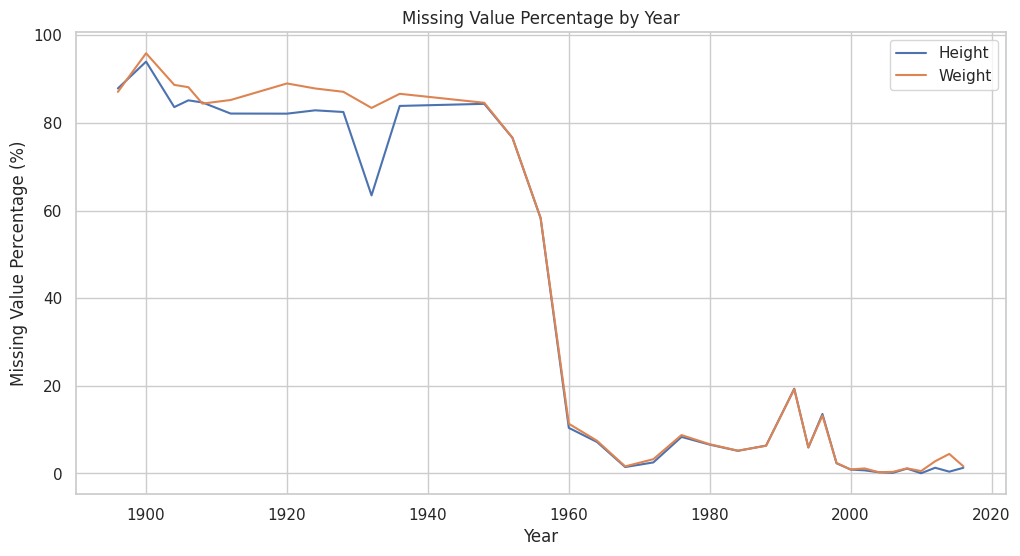

In [95]:
# 연도별 키, 몸무게 결측치 비율 확인
missing_by_year = df_merged.groupby('Year').apply(lambda x: x.isnull().mean() * 100)

features_to_plot = ['Height', 'Weight']

plt.figure(figsize=(12, 6))
for feature in features_to_plot:
  plt.plot(missing_by_year.index, missing_by_year[feature], label=feature)

plt.xlabel('Year')
plt.ylabel('Missing Value Percentage (%)')
plt.title('Missing Value Percentage by Year')
plt.legend()
plt.grid(True)
plt.show()

In [96]:
# Year 컬럼이 1968년 이상인 데이터만 필터링 후 결측치 확인
df_filtered = df_merged[df_merged['Year'] >= 1968]
df_filtered.isna().sum()

,0
ID,0
Name,0
Sex,0
Age,838
Height,9477
Weight,10068
Team,0
NOC,0
Games,0
Year,0


In [97]:
# 1968년 이후 데이터로 추출 후 결측값 비율 확인

df_filtered.isnull().mean()*100

,0
ID,0.000000
Name,0.000000
Sex,0.000000
Age,0.440225
Height,4.978540
Weight,5.289010
Team,0.000000
NOC,0.000000
Games,0.000000
Year,0.000000


**Height, Weight의 결측치 비율이 22-23% -> 4-5%로 감소**

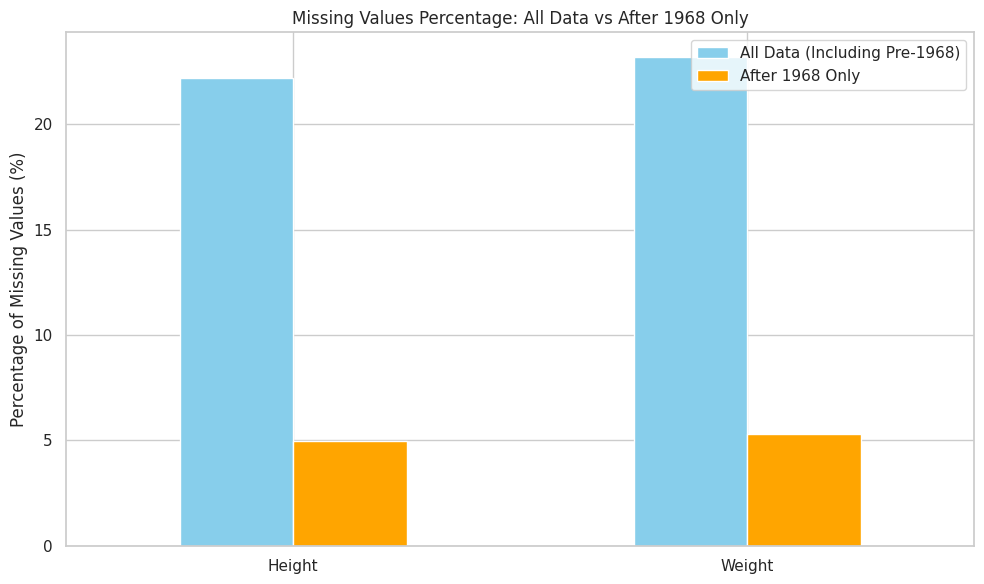

In [98]:
# 전체 데이터 / 1968년도 이후 데이터 결측치 비율 시각화

df_missing = df_merged.isnull().mean() * 100  # 전체 데이터 결측치 비율
df_filtered_missing = df_filtered.isnull().mean() * 100  # 1968년도 이후 데이터 결측치 비율

# 그래프 생성을 위한 데이터프레임 생성
comparison_missing_data = pd.DataFrame({
    'All Data (Including Pre-1968)': df_missing,
    'After 1968 Only': df_filtered_missing
})
comparison = comparison_missing_data.loc[['Height', 'Weight']]
comparison.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'orange'])

plt.title('Missing Values Percentage: All Data vs After 1968 Only')
plt.ylabel('Percentage of Missing Values (%)')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

In [99]:
# Year기준으로 오름차순 정렬(첫 10줄만 출력)

df_filtered.sort_values("Year").head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
133386,67145,Kalevi Johannes Laurila,M,30.0,178.0,68.0,Finland,FIN,1968 Winter,1968,Winter,Grenoble,Cross Country Skiing,Cross Country Skiing Men's 50 kilometres,NaN,Finland,NaN
187690,94327,Gnther Pfaff,M,29.0,177.0,73.0,Austria,AUT,1968 Summer,1968,Summer,Mexico City,Canoeing,"Canoeing Men's Kayak Doubles, 1,000 metres",Bronze,Austria,NaN
187691,94327,Gnther Pfaff,M,29.0,177.0,73.0,Austria,AUT,1968 Summer,1968,Summer,Mexico City,Canoeing,"Canoeing Men's Kayak Fours, 1,000 metres",NaN,Austria,NaN
36625,18826,Vra slavsk (-Odloilov),F,26.0,160.0,58.0,Czechoslovakia,TCH,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Women's Individual All-Around,Gold,Czech Republic,NaN
36626,18826,Vra slavsk (-Odloilov),F,26.0,160.0,58.0,Czechoslovakia,TCH,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Women's Team All-Around,Silver,Czech Republic,NaN
187721,94336,Anna Pfeffer,F,23.0,168.0,67.0,Hungary,HUN,1968 Summer,1968,Summer,Mexico City,Canoeing,"Canoeing Women's Kayak Singles, 500 metres",NaN,Hungary,NaN
187722,94336,Anna Pfeffer,F,23.0,168.0,67.0,Hungary,HUN,1968 Summer,1968,Summer,Mexico City,Canoeing,"Canoeing Women's Kayak Doubles, 500 metres",Silver,Hungary,NaN
36627,18826,Vra slavsk (-Odloilov),F,26.0,160.0,58.0,Czechoslovakia,TCH,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Women's Floor Exercise,Gold,Czech Republic,NaN
36628,18826,Vra slavsk (-Odloilov),F,26.0,160.0,58.0,Czechoslovakia,TCH,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Women's Horse Vault,Gold,Czech Republic,NaN
58223,29794,Barry Christopher Downs,M,38.0,178.0,79.0,Australia,AUS,1968 Summer,1968,Summer,Mexico City,Shooting,"Shooting Mixed Free Pistol, 50 metres",NaN,Australia,NaN


1968년 이후로 잘 처리됨.

In [100]:
# 필터링된 데이터 통계값 확인

df_filtered.describe()

,ID,Age,Height,Weight,Year
count,190357.000000,189519.000000,180880.000000,180289.000000,190357.000000
mean,68451.551648,24.958374,175.549160,70.775985,1994.791670
std,39099.504611,5.459420,10.718055,14.667423,14.326217
min,1.000000,11.000000,127.000000,25.000000,1968.000000
25%,34923.000000,21.000000,168.000000,60.000000,1984.000000
50%,68523.000000,24.000000,175.000000,70.000000,1996.000000
75%,102143.000000,28.000000,183.000000,80.000000,2008.000000
max,135571.000000,71.000000,226.000000,214.000000,2016.000000


In [101]:
# 중복 데이터 확인
df_filtered[df_filtered.duplicated()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes


중복 데이터 이상 x

In [102]:
# 결측치 평균값으로 대체하기

# 각 종목(Event)별로 평균 신장(Height)과 체중(Weight) 계산
avg_values = df_filtered.groupby('Event')[['Height', 'Weight']].mean()
# Height: 175.338970, Weight: 70.702393

# 결측치를 채우는 함수 정의 (정수형으로 변환)
def fill_missing_values(row):
    if pd.isnull(row['Height']):
        row['Height'] = int(round(avg_values.loc[row['Event'], 'Height']))  # 평균을 반올림 후 정수형으로 변환
    if pd.isnull(row['Weight']):
        row['Weight'] = int(round(avg_values.loc[row['Event'], 'Weight']))  # 평균을 반올림 후 정수형으로 변환
    return row

# apply 함수로 결측치 채우기
df_filtered = df_filtered.apply(fill_missing_values, axis=1)

In [103]:
df_filtered.isnull().sum()

,0
ID,0
Name,0
Sex,0
Age,838
Height,0
Weight,0
Team,0
NOC,0
Games,0
Year,0


**Height와 Weight의 결측치 처리 확인**

In [104]:
df_filtered[df_filtered['Height'].isna()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes


---
### 이상치

In [105]:
# 키가 큰 순서대로 20명 출력
# 중복된 이름(여러번 참가한 선수)은 한번만 출력
df_filtered.drop_duplicates(subset=['Name']).sort_values('Height', ascending=False).head(20)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
265040,132627,Yao Ming,M,20.0,226.0,141.0,China,CHN,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,NaN,China,NaN
32376,16639,Tommy Loren Burleson,M,20.0,223.0,102.0,United States,USA,1972 Summer,1972,Summer,Munich,Basketball,Basketball Men's Basketball,Silver,USA,NaN
207373,104059,Arvydas Romas Sabonis,M,23.0,223.0,122.0,Soviet Union,URS,1988 Summer,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Gold,Russia,NaN
269053,134621,Zhang Zhaoxu,M,24.0,221.0,110.0,China,CHN,2012 Summer,2012,Summer,London,Basketball,Basketball Men's Basketball,NaN,China,NaN
17669,9407,Gunther Behnke,M,29.0,221.0,114.0,Germany,GER,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,Germany,NaN
59371,30409,Roberto Dueas Hernndez,M,24.0,221.0,137.0,Spain,ESP,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,NaN,Spain,NaN
181241,91087,Viktor Aleksandrovich Pankrashkin,M,31.0,220.0,112.0,Soviet Union,URS,1988 Summer,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Gold,Russia,NaN
240656,120589,Volodymyr Petrovych Tkachenko,M,18.0,220.0,110.0,Soviet Union,URS,1976 Summer,1976,Summer,Montreal,Basketball,Basketball Men's Basketball,Bronze,Russia,NaN
141983,71228,"Lucien James ""Luc"" Longley",M,19.0,220.0,135.0,Australia,AUS,1988 Summer,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,NaN,Australia,NaN
166544,83657,Dmitry Aleksandrovich Musersky,M,23.0,219.0,104.0,Russia,RUS,2012 Summer,2012,Summer,London,Volleyball,Volleyball Men's Volleyball,Gold,Russia,NaN


In [106]:
# 마찬가지로 키가 작은 순서대로 20명 출력
df_filtered.drop_duplicates(subset=['Name']).sort_values('Height', ascending=True).head(20)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
164821,82769,Lyton Levison Mphande,M,25.0,127.0,62.0,Malawi,MAW,1988 Summer,1988,Summer,Seoul,Boxing,Boxing Men's Light-Welterweight,NaN,Malawi,NaN
29333,15150,Rosario Briones,F,15.0,127.0,42.0,Mexico,MEX,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Women's Individual All-Around,NaN,Mexico,NaN
180615,90772,Helman Palije,M,21.0,128.0,74.0,Malawi,MAW,1988 Summer,1988,Summer,Seoul,Boxing,Boxing Men's Middleweight,NaN,Malawi,NaN
159934,80255,Salvador Miranda,M,22.0,130.0,51.0,Nicaragua,NCA,1972 Summer,1972,Summer,Munich,Boxing,Boxing Men's Flyweight,NaN,Nicaragua,NaN
220270,110638,Boston Simbeye,M,28.0,130.0,67.0,Malawi,MAW,1988 Summer,1988,Summer,Seoul,Boxing,Boxing Men's Welterweight,NaN,Malawi,NaN
68861,35122,Nadia Fezzani,F,NaN,131.0,41.0,Libya,LBA,1980 Summer,1980,Summer,Moskva,Swimming,Swimming Women's 100 metres Freestyle,NaN,Libya,NaN
148696,74578,Ana Olvido Manso Gallego,F,18.0,132.0,31.0,Spain,ESP,1984 Summer,1984,Summer,Los Angeles,Gymnastics,Gymnastics Women's Individual All-Around,NaN,Spain,NaN
44255,22824,Michael Conway,M,19.0,132.0,48.0,Canada,CAN,1972 Summer,1972,Summer,Munich,Rowing,Rowing Men's Coxed Fours,NaN,Canada,NaN
3778,2174,Khamis Mohamed Saif Al-Subhi,M,NaN,132.0,58.0,Oman,OMA,1984 Summer,1984,Summer,Los Angeles,Shooting,"Shooting Men's Air Rifle, 10 metres",NaN,Oman,NaN
3510,2003,Said Mubarak Marhoon Al-Khatry,M,NaN,132.0,66.0,Oman,OMA,1984 Summer,1984,Summer,Los Angeles,Shooting,"Shooting Men's Rapid-Fire Pistol, 25 metres",NaN,Oman,NaN


In [107]:
# 체중이 많이 나가는 순서대로 20명 출력
df_filtered.drop_duplicates(subset=['Name']).sort_values('Weight', ascending=False).head(20)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
23155,12177,"Ricardo Blas, Jr.",M,21.0,183.0,214.0,Guam,GUM,2008 Summer,2008,Summer,Beijing,Judo,Judo Men's Heavyweight,NaN,Guam,NaN
205467,103159,Aytami Ruano Vega,M,27.0,200.0,198.0,Spain,ESP,2004 Summer,2004,Summer,Athina,Judo,Judo Men's Heavyweight,NaN,Spain,NaN
237039,118869,"Christopher J. ""Chris"" Taylor",M,22.0,196.0,182.0,United States,USA,1972 Summer,1972,Summer,Munich,Wrestling,"Wrestling Men's Super-Heavyweight, Greco-Roman",NaN,USA,NaN
206352,103580,Valentyn Rusliakov,M,28.0,187.0,180.0,Ukraine,UKR,2000 Summer,2000,Summer,Sydney,Judo,Judo Men's Heavyweight,NaN,Ukraine,NaN
206004,103413,Leonel Wilfredo Ruz Carmona,M,29.0,187.0,178.0,Venezuela,VEN,2004 Summer,2004,Summer,Athina,Judo,Judo Men's Heavyweight,NaN,Venezuela,NaN
94362,47755,"Marcus Jerrold ""Mark"" Henry",M,21.0,190.0,176.5,United States,USA,1992 Summer,1992,Summer,Barcelona,Weightlifting,Weightlifting Men's Super-Heavyweight,NaN,USA,NaN
173166,87041,Dmitry Yuryevich Nosov,M,24.0,176.0,175.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Judo,Judo Men's Half-Middleweight,Bronze,Russia,NaN
39181,20144,Andrey Ivanovich Chemerkin,M,24.0,183.0,170.0,Russia,RUS,1996 Summer,1996,Summer,Atlanta,Weightlifting,Weightlifting Men's Super-Heavyweight,Gold,Russia,NaN
168480,84679,Illie Daniel Natea,M,24.0,203.0,170.0,Romania,ROU,2016 Summer,2016,Summer,Rio de Janeiro,Judo,Judo Men's Heavyweight,NaN,Romania,NaN
262338,131260,Janusz Wojnarowicz,M,28.0,199.0,170.0,Poland,POL,2008 Summer,2008,Summer,Beijing,Judo,Judo Men's Heavyweight,NaN,Poland,NaN


In [108]:
# 체중이 적게 나가는 순서대로 20명 출력
df_filtered.drop_duplicates(subset=['Name']).sort_values('Weight', ascending=True).head(20)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
40849,21049,Choi Myong-Hui,F,14.0,135.0,25.0,North Korea,PRK,1980 Summer,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Individual All-Around,NaN,North Korea,NaN
264539,132383,Kana Yamawaki,F,16.0,141.0,28.0,Japan,JPN,2000 Summer,2000,Summer,Sydney,Gymnastics,Gymnastics Women's Individual All-Around,NaN,Japan,NaN
256836,128605,Wang Xin (Ruoxue-),F,15.0,137.0,28.0,China,CHN,2008 Summer,2008,Summer,Beijing,Diving,Diving Women's Platform,Bronze,China,NaN
109863,55553,Anita Jokiel,F,13.0,142.0,28.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Individual All-Around,NaN,Poland,NaN
163755,82193,Sara Moro de Faes,F,16.0,139.0,30.0,Spain,ESP,2000 Summer,2000,Summer,Sydney,Gymnastics,Gymnastics Women's Individual All-Around,NaN,Spain,NaN
220034,110533,Lia Henrique da Silva Nicolosi,F,31.0,169.0,30.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Volleyball,Volleyball Women's Volleyball,NaN,Brazil,NaN
143275,71914,Lu Li,F,15.0,136.0,30.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Gymnastics,Gymnastics Women's Individual All-Around,NaN,China,NaN
52617,27017,Cline Degrange,F,13.0,150.0,30.0,France,FRA,1992 Summer,1992,Summer,Barcelona,Rhythmic Gymnastics,Rhythmic Gymnastics Women's Individual,NaN,France,NaN
218188,109593,Liubov Sheremeta,F,16.0,136.0,30.0,Ukraine,UKR,1996 Summer,1996,Summer,Atlanta,Gymnastics,Gymnastics Women's Individual All-Around,NaN,Ukraine,NaN
40674,20960,Choe Jong-Sil,F,14.0,141.0,30.0,North Korea,PRK,1980 Summer,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Individual All-Around,NaN,North Korea,NaN


In [109]:
df_filtered.sort_values("Weight").tail(20)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
63391,32496,Ion Emilianov,M,23.0,202.0,165.0,Moldova,MDA,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Men's Shot Put,NaN,Moldova,NaN
63392,32496,Ion Emilianov,M,27.0,202.0,165.0,Moldova,MDA,2004 Summer,2004,Summer,Athina,Athletics,Athletics Men's Shot Put,NaN,Moldova,NaN
124419,62843,Olha Vasylivna Korobka,F,18.0,181.0,167.0,Ukraine,UKR,2004 Summer,2004,Summer,Athina,Weightlifting,Weightlifting Women's Super-Heavyweight,NaN,Ukraine,NaN
124420,62843,Olha Vasylivna Korobka,F,22.0,181.0,167.0,Ukraine,UKR,2008 Summer,2008,Summer,Beijing,Weightlifting,Weightlifting Women's Super-Heavyweight,Silver,Ukraine,NaN
262339,131260,Janusz Wojnarowicz,M,32.0,199.0,170.0,Poland,POL,2012 Summer,2012,Summer,London,Judo,Judo Men's Heavyweight,NaN,Poland,NaN
262338,131260,Janusz Wojnarowicz,M,28.0,199.0,170.0,Poland,POL,2008 Summer,2008,Summer,Beijing,Judo,Judo Men's Heavyweight,NaN,Poland,NaN
39182,20144,Andrey Ivanovich Chemerkin,M,28.0,183.0,170.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Weightlifting,Weightlifting Men's Super-Heavyweight,Bronze,Russia,NaN
39181,20144,Andrey Ivanovich Chemerkin,M,24.0,183.0,170.0,Russia,RUS,1996 Summer,1996,Summer,Atlanta,Weightlifting,Weightlifting Men's Super-Heavyweight,Gold,Russia,NaN
168480,84679,Illie Daniel Natea,M,24.0,203.0,170.0,Romania,ROU,2016 Summer,2016,Summer,Rio de Janeiro,Judo,Judo Men's Heavyweight,NaN,Romania,NaN
173166,87041,Dmitry Yuryevich Nosov,M,24.0,176.0,175.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Judo,Judo Men's Half-Middleweight,Bronze,Russia,NaN


In [110]:
df_filtered.sort_values("Weight").head(20)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
40854,21049,Choi Myong-Hui,F,14.0,135.0,25.0,North Korea,PRK,1980 Summer,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Balance Beam,NaN,North Korea,NaN
40852,21049,Choi Myong-Hui,F,14.0,135.0,25.0,North Korea,PRK,1980 Summer,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Horse Vault,NaN,North Korea,NaN
40851,21049,Choi Myong-Hui,F,14.0,135.0,25.0,North Korea,PRK,1980 Summer,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Floor Exercise,NaN,North Korea,NaN
40850,21049,Choi Myong-Hui,F,14.0,135.0,25.0,North Korea,PRK,1980 Summer,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Team All-Around,NaN,North Korea,NaN
40849,21049,Choi Myong-Hui,F,14.0,135.0,25.0,North Korea,PRK,1980 Summer,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Individual All-Around,NaN,North Korea,NaN
40853,21049,Choi Myong-Hui,F,14.0,135.0,25.0,North Korea,PRK,1980 Summer,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Uneven Bars,NaN,North Korea,NaN
264540,132383,Kana Yamawaki,F,16.0,141.0,28.0,Japan,JPN,2000 Summer,2000,Summer,Sydney,Gymnastics,Gymnastics Women's Floor Exercise,NaN,Japan,NaN
109868,55553,Anita Jokiel,F,13.0,142.0,28.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Balance Beam,NaN,Poland,NaN
109867,55553,Anita Jokiel,F,13.0,142.0,28.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Uneven Bars,NaN,Poland,NaN
109866,55553,Anita Jokiel,F,13.0,142.0,28.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Horse Vault,NaN,Poland,NaN


In [111]:
df_filtered.sort_values("Height").head(20)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
29336,15150,Rosario Briones,F,15.0,127.0,42.0,Mexico,MEX,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Women's Horse Vault,NaN,Mexico,NaN
29338,15150,Rosario Briones,F,15.0,127.0,42.0,Mexico,MEX,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Women's Balance Beam,NaN,Mexico,NaN
29335,15150,Rosario Briones,F,15.0,127.0,42.0,Mexico,MEX,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Women's Floor Exercise,NaN,Mexico,NaN
164821,82769,Lyton Levison Mphande,M,25.0,127.0,62.0,Malawi,MAW,1988 Summer,1988,Summer,Seoul,Boxing,Boxing Men's Light-Welterweight,NaN,Malawi,NaN
29333,15150,Rosario Briones,F,15.0,127.0,42.0,Mexico,MEX,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Women's Individual All-Around,NaN,Mexico,NaN
29337,15150,Rosario Briones,F,15.0,127.0,42.0,Mexico,MEX,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Women's Uneven Bars,NaN,Mexico,NaN
29334,15150,Rosario Briones,F,15.0,127.0,42.0,Mexico,MEX,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Women's Team All-Around,NaN,Mexico,NaN
180615,90772,Helman Palije,M,21.0,128.0,74.0,Malawi,MAW,1988 Summer,1988,Summer,Seoul,Boxing,Boxing Men's Middleweight,NaN,Malawi,NaN
159934,80255,Salvador Miranda,M,22.0,130.0,51.0,Nicaragua,NCA,1972 Summer,1972,Summer,Munich,Boxing,Boxing Men's Flyweight,NaN,Nicaragua,NaN
220270,110638,Boston Simbeye,M,28.0,130.0,67.0,Malawi,MAW,1988 Summer,1988,Summer,Seoul,Boxing,Boxing Men's Welterweight,NaN,Malawi,NaN


---
### 데이터셋 편집

In [112]:
# 분석에 사용할 BMI열 생성
# Height를 미터로 변환한 후 BMI 계산(소수점 두째자리까지 반올림)
df_filtered['BMI'] = df_filtered['Weight'] / (df_filtered['Height'] / 100) ** 2
df_filtered['BMI'] = df_filtered['BMI'].round(2)
df_filtered

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,BMI
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,24.69
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,20.76
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN,23.96
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN,23.96
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN,23.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,Poland,NaN,27.78
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,Poland,NaN,19.05
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,Poland,NaN,19.05
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,NaN,28.05


In [113]:
df_raw = df_filtered
df_1 = df_filtered
# 데이터 가독성 높이기 위해 원래 파일인 filtered는 raw 파일로 두고, df_1로 만들어 수정

In [114]:
# BMI와 상관없는 데이터들 다 지움
df_1 = df_1.drop(['Name', 'ID', 'Games', 'Age', 'Team',	'City', 'notes', 'region'], axis=1)

In [115]:
# 데이터셋 개요 확인
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 190357 entries, 0 to 271115
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Sex     190357 non-null  object 
 1   Height  190357 non-null  float64
 2   Weight  190357 non-null  float64
 3   NOC     190357 non-null  object 
 4   Year    190357 non-null  int64  
 5   Season  190357 non-null  object 
 6   Sport   190357 non-null  object 
 7   Event   190357 non-null  object 
 8   Medal   26127 non-null   object 
 9   BMI     190357 non-null  float64
dtypes: float64(3), int64(1), object(6)
memory usage: 16.0+ MB


In [116]:
df_1 = df_1[['Sport', 'Event', 'Medal', 'Sex', 'BMI', 'Height', 'Weight', 'NOC', 'Year', 'Season']]
df_1
# 중요한 데이터를 가독성 높이기 위해 순서 정리

,Sport,Event,Medal,Sex,BMI,Height,Weight,NOC,Year,Season
0,Basketball,Basketball Men's Basketball,NaN,M,24.69,180.0,80.0,CHN,1992,Summer
1,Judo,Judo Men's Extra-Lightweight,NaN,M,20.76,170.0,60.0,CHN,2012,Summer
4,Speed Skating,Speed Skating Women's 500 metres,NaN,F,23.96,185.0,82.0,NED,1988,Winter
5,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,F,23.96,185.0,82.0,NED,1988,Winter
6,Speed Skating,Speed Skating Women's 500 metres,NaN,F,23.96,185.0,82.0,NED,1992,Winter
...,...,...,...,...,...,...,...,...,...,...
271111,Luge,Luge Mixed (Men)'s Doubles,NaN,M,27.78,179.0,89.0,POL,1976,Winter
271112,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,M,19.05,176.0,59.0,POL,2014,Winter
271113,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,M,19.05,176.0,59.0,POL,2014,Winter
271114,Bobsleigh,Bobsleigh Men's Four,NaN,M,28.05,185.0,96.0,POL,1998,Winter


In [117]:
df_1.sort_values("BMI").head(15)

,Sport,Event,Medal,Sex,BMI,Height,Weight,NOC,Year,Season
220034,Volleyball,Volleyball Women's Volleyball,NaN,F,10.50,169.0,30.0,BRA,2016,Summer
65539,Gymnastics,Gymnastics Women's Balance Beam,NaN,F,12.27,176.0,38.0,BEL,1992,Summer
65538,Gymnastics,Gymnastics Women's Uneven Bars,NaN,F,12.27,176.0,38.0,BEL,1992,Summer
65537,Gymnastics,Gymnastics Women's Horse Vault,NaN,F,12.27,176.0,38.0,BEL,1992,Summer
65536,Gymnastics,Gymnastics Women's Floor Exercise,NaN,F,12.27,176.0,38.0,BEL,1992,Summer
65535,Gymnastics,Gymnastics Women's Individual All-Around,NaN,F,12.27,176.0,38.0,BEL,1992,Summer
150944,Gymnastics,Gymnastics Women's Horse Vault,NaN,F,12.50,160.0,32.0,ESP,1984,Summer
150943,Gymnastics,Gymnastics Women's Floor Exercise,NaN,F,12.50,160.0,32.0,ESP,1984,Summer
150942,Gymnastics,Gymnastics Women's Team All-Around,NaN,F,12.50,160.0,32.0,ESP,1984,Summer
150941,Gymnastics,Gymnastics Women's Individual All-Around,NaN,F,12.50,160.0,32.0,ESP,1984,Summer


In [118]:
df_1.sort_values("BMI").tail(15)

,Sport,Event,Medal,Sex,BMI,Height,Weight,NOC,Year,Season
94363,Weightlifting,Weightlifting Men's Super-Heavyweight,NaN,M,48.89,190.0,176.5,USA,1996,Summer
205467,Judo,Judo Men's Heavyweight,NaN,M,49.50,200.0,198.0,ESP,2004,Summer
224887,Weightlifting,Weightlifting Women's Super-Heavyweight,NaN,F,49.95,165.0,136.0,NRU,2004,Summer
39181,Weightlifting,Weightlifting Men's Super-Heavyweight,Gold,M,50.76,183.0,170.0,RUS,1996,Summer
39182,Weightlifting,Weightlifting Men's Super-Heavyweight,Bronze,M,50.76,183.0,170.0,RUS,2000,Summer
206004,Judo,Judo Men's Heavyweight,NaN,M,50.90,187.0,178.0,VEN,2004,Summer
124420,Weightlifting,Weightlifting Women's Super-Heavyweight,Silver,F,50.98,181.0,167.0,UKR,2008,Summer
124419,Weightlifting,Weightlifting Women's Super-Heavyweight,NaN,F,50.98,181.0,167.0,UKR,2004,Summer
206352,Judo,Judo Men's Heavyweight,NaN,M,51.47,187.0,180.0,UKR,2000,Summer
148349,Weightlifting,Weightlifting Women's Super-Heavyweight,NaN,F,51.79,173.0,155.0,USA,2012,Summer


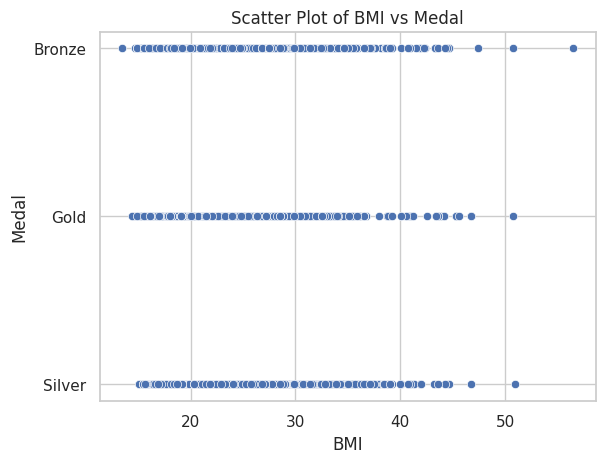

In [119]:
sns.scatterplot(x='BMI', y='Medal', data=df_1)
plt.title('Scatter Plot of BMI vs Medal')
plt.show()

In [120]:
df_1.isnull().sum()

,0
Sport,0
Event,0
Medal,164230
Sex,0
BMI,0
Height,0
Weight,0
NOC,0
Year,0
Season,0


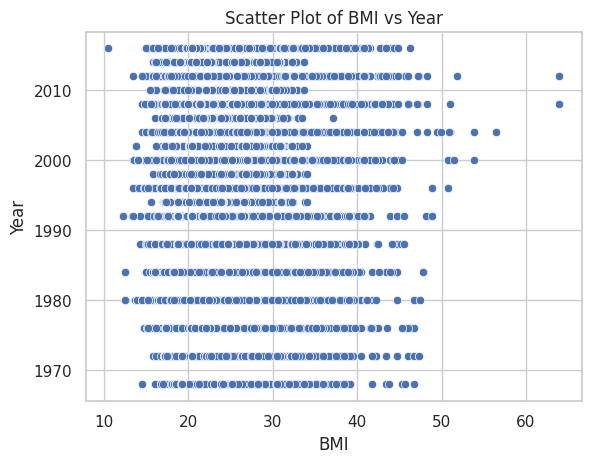

In [121]:
sns.scatterplot(x='BMI', y='Year', data=df_1)
plt.title('Scatter Plot of BMI vs Year')
plt.show()

In [122]:
df_wc = df_1
# 원핫 인코딩 위해 새로운 파일로 변환함(혹시 실수할까봐)

In [123]:
df_wc.head()

,Sport,Event,Medal,Sex,BMI,Height,Weight,NOC,Year,Season
0,Basketball,Basketball Men's Basketball,NaN,M,24.69,180.0,80.0,CHN,1992,Summer
1,Judo,Judo Men's Extra-Lightweight,NaN,M,20.76,170.0,60.0,CHN,2012,Summer
4,Speed Skating,Speed Skating Women's 500 metres,NaN,F,23.96,185.0,82.0,NED,1988,Winter
5,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,F,23.96,185.0,82.0,NED,1988,Winter
6,Speed Skating,Speed Skating Women's 500 metres,NaN,F,23.96,185.0,82.0,NED,1992,Winter


In [124]:
df_wc['Event'].nunique() # Event(세부종목)의 중복되지 않는 값 총 485개

485

In [125]:
df_wc['Sport'].nunique() # Sport(대분류 종목)의 중복되지 않는 값 총 51개

51

In [126]:
df_wc[df_wc['Sport'] == 'Basketball']['Event'].nunique()

2

In [127]:
df_wc['Sport'].unique()

array(['Basketball', 'Judo', 'Speed Skating', 'Cross Country Skiing',
       'Ice Hockey', 'Badminton', 'Sailing', 'Biathlon', 'Athletics',
       'Alpine Skiing', 'Handball', 'Weightlifting', 'Wrestling', 'Luge',
       'Water Polo', 'Hockey', 'Rowing', 'Bobsleigh', 'Swimming',
       'Football', 'Equestrianism', 'Boxing', 'Gymnastics', 'Taekwondo',
       'Fencing', 'Diving', 'Canoeing', 'Tennis', 'Shooting', 'Cycling',
       'Figure Skating', 'Softball', 'Archery', 'Volleyball',
       'Synchronized Swimming', 'Modern Pentathlon', 'Table Tennis',
       'Nordic Combined', 'Baseball', 'Rhythmic Gymnastics',
       'Freestyle Skiing', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Curling', 'Golf', 'Snowboarding',
       'Ski Jumping', 'Short Track Speed Skating', 'Skeleton'],
      dtype=object)

In [128]:
df_wc = pd.get_dummies(df_wc, columns=['Sex'], dtype=int, drop_first= True)
# 성별을 숫자로 원핫인코딩, 추후 male을 1, female을 0으로 한 sex_m만 남기고, sex_f는 제거함

In [129]:
df_wc2 = df_wc.dropna(subset=['Medal']) # medal 안딴사람들 데이터를 없애버림
# 운동선수 전체 bmi와 메달 딴 선수의 bmi를 비교

# 비메달리스트인 NaN 선수들만 남기기
df_wc3 = df_wc[df_wc['Medal'].isna()]

In [130]:
pd.get_dummies(df_wc2, columns=['Medal'], dtype=int) #medal 별로 구분

,Sport,Event,BMI,Height,Weight,NOC,Year,Season,Sex_M,Medal_Bronze,Medal_Gold,Medal_Silver
40,Ice Hockey,Ice Hockey Men's Ice Hockey,25.11,184.0,85.0,FIN,2014,Winter,1,1,0,0
60,Alpine Skiing,Alpine Skiing Men's Super G,27.44,176.0,85.0,NOR,1992,Winter,1,0,1,0
61,Alpine Skiing,Alpine Skiing Men's Giant Slalom,27.44,176.0,85.0,NOR,1992,Winter,1,1,0,0
63,Alpine Skiing,Alpine Skiing Men's Downhill,27.44,176.0,85.0,NOR,1994,Winter,1,0,0,1
64,Alpine Skiing,Alpine Skiing Men's Super G,27.44,176.0,85.0,NOR,1994,Winter,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
271048,Rowing,Rowing Men's Double Sculls,23.96,197.0,93.0,NED,1992,Summer,1,1,0,0
271049,Rowing,Rowing Men's Coxed Eights,23.96,197.0,93.0,NED,1996,Summer,1,0,1,0
271082,Fencing,"Fencing Men's Foil, Team",24.76,182.0,82.0,POL,1980,Summer,1,1,0,0
271102,Athletics,Athletics Women's 4 x 400 metres Relay,21.89,171.0,64.0,RUS,2000,Summer,0,1,0,0


In [131]:
pd.set_option('display.max_columns', 50)

In [132]:
pd.get_dummies(df_wc2, columns=['Event'], dtype=int)

,Sport,Medal,BMI,Height,Weight,NOC,Year,Season,Sex_M,Event_Alpine Skiing Men's Combined,Event_Alpine Skiing Men's Downhill,Event_Alpine Skiing Men's Giant Slalom,Event_Alpine Skiing Men's Slalom,Event_Alpine Skiing Men's Super G,Event_Alpine Skiing Women's Combined,Event_Alpine Skiing Women's Downhill,Event_Alpine Skiing Women's Giant Slalom,Event_Alpine Skiing Women's Slalom,Event_Alpine Skiing Women's Super G,Event_Archery Men's Individual,Event_Archery Men's Team,Event_Archery Women's Individual,Event_Archery Women's Team,"Event_Athletics Men's 1,500 metres","Event_Athletics Men's 10,000 metres",...,"Event_Wrestling Men's Bantamweight, Greco-Roman","Event_Wrestling Men's Featherweight, Freestyle","Event_Wrestling Men's Featherweight, Greco-Roman","Event_Wrestling Men's Flyweight, Freestyle","Event_Wrestling Men's Flyweight, Greco-Roman","Event_Wrestling Men's Heavyweight, Freestyle","Event_Wrestling Men's Heavyweight, Greco-Roman","Event_Wrestling Men's Light-Flyweight, Freestyle","Event_Wrestling Men's Light-Flyweight, Greco-Roman","Event_Wrestling Men's Light-Heavyweight, Freestyle","Event_Wrestling Men's Light-Heavyweight, Greco-Roman","Event_Wrestling Men's Lightweight, Freestyle","Event_Wrestling Men's Lightweight, Greco-Roman","Event_Wrestling Men's Middleweight, Freestyle","Event_Wrestling Men's Middleweight, Greco-Roman","Event_Wrestling Men's Super-Heavyweight, Freestyle","Event_Wrestling Men's Super-Heavyweight, Greco-Roman","Event_Wrestling Men's Welterweight, Freestyle","Event_Wrestling Men's Welterweight, Greco-Roman","Event_Wrestling Women's Featherweight, Freestyle","Event_Wrestling Women's Flyweight, Freestyle","Event_Wrestling Women's Heavyweight, Freestyle","Event_Wrestling Women's Light-Heavyweight, Freestyle","Event_Wrestling Women's Lightweight, Freestyle","Event_Wrestling Women's Middleweight, Freestyle"
40,Ice Hockey,Bronze,25.11,184.0,85.0,FIN,2014,Winter,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
60,Alpine Skiing,Gold,27.44,176.0,85.0,NOR,1992,Winter,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
61,Alpine Skiing,Bronze,27.44,176.0,85.0,NOR,1992,Winter,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
63,Alpine Skiing,Silver,27.44,176.0,85.0,NOR,1994,Winter,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
64,Alpine Skiing,Bronze,27.44,176.0,85.0,NOR,1994,Winter,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271048,Rowing,Bronze,23.96,197.0,93.0,NED,1992,Summer,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
271049,Rowing,Gold,23.96,197.0,93.0,NED,1996,Summer,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
271082,Fencing,Bronze,24.76,182.0,82.0,POL,1980,Summer,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
271102,Athletics,Bronze,21.89,171.0,64.0,RUS,2000,Summer,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [133]:
# 24년 파리 하계 올림픽, 22년 베이징 동계 올림픽 한국 메달 획득 종목 선별
sports_to_keep = ['Archery', 'Badminton', 'Boxing', 'Fencing',
                  'Judo','Modern Pentathlon', 'Shooting', 'Swimming',
                  'Table Tennis', 'Taekwondo', 'Weightlifting',
                  'Short Track Speed Skating', 'Speed Skating']

df_wc4 = df_wc2[df_wc2['Sport'].isin(sports_to_keep)]
df_wc3 = df_wc3[df_wc3['Sport'].isin(sports_to_keep)]

<ipython-input-134-391cc2f56dce>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Sport', y='BMI', data=df_wc4, order=sports_to_keep, palette='Set2', inner='quartile')
<ipython-input-134-391cc2f56dce>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Sport', y='BMI', data=df_wc3, order=sports_to_keep, palette='Set2', inner='quartile')


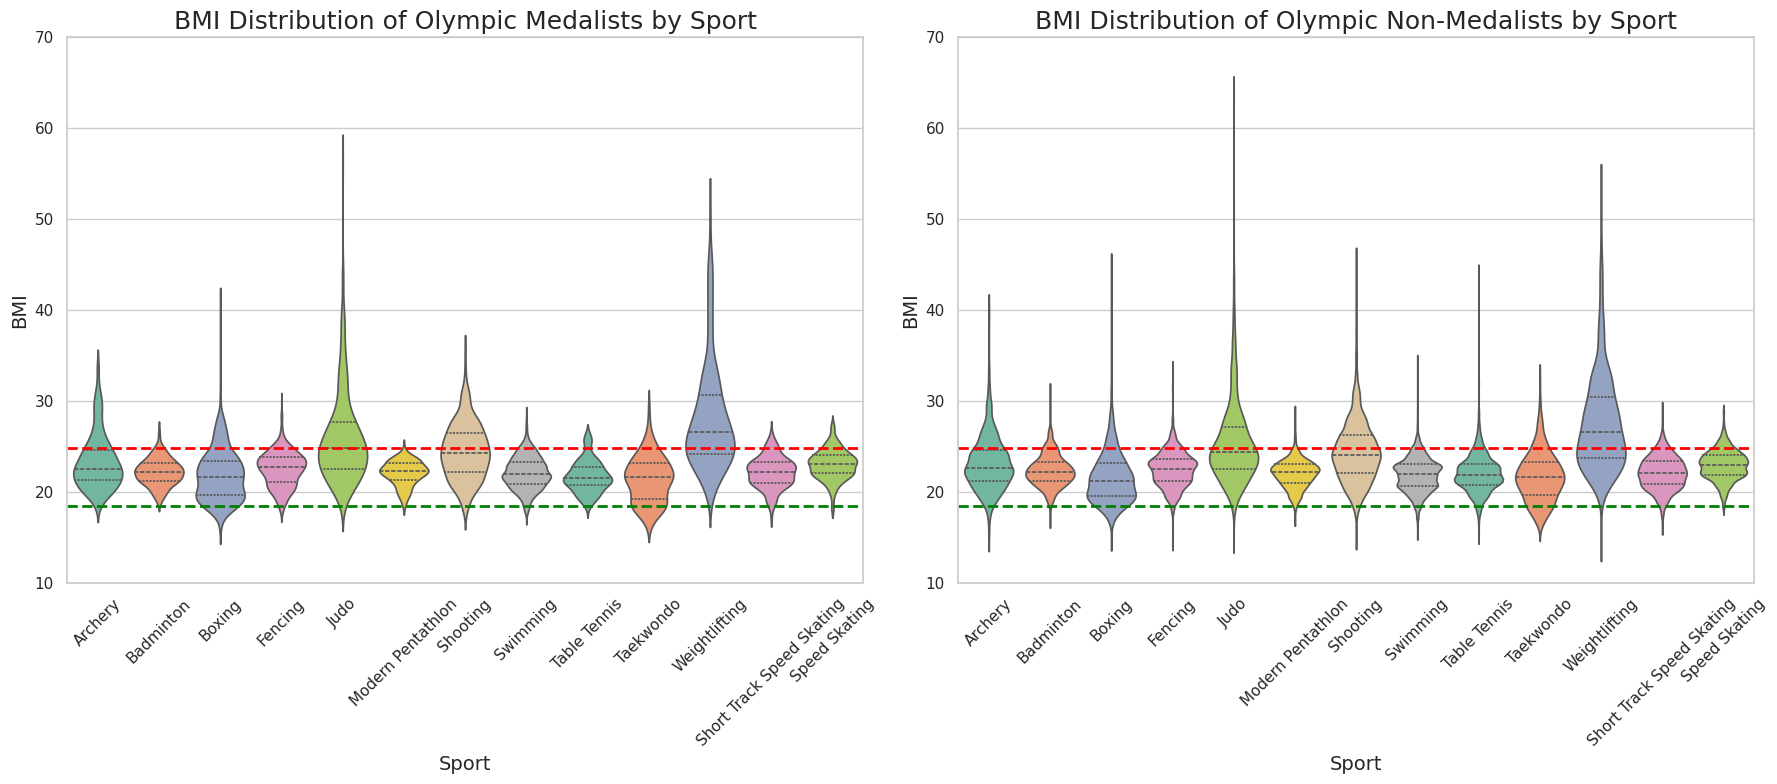

In [134]:
# 그래프 크기 조정 및 스타일 설정
plt.figure(figsize=(18, 8))  # 전체 그래프의 크기
sns.set(style="whitegrid")

# y축 범위 설정 (예: 0부터 70까지)
y_limit = (10, 70)

# 1행 2열의 첫 번째 subplot (메달리스트)
plt.subplot(1, 2, 1)  # 첫 번째 플롯
sns.violinplot(x='Sport', y='BMI', data=df_wc4, order=sports_to_keep, palette='Set2', inner='quartile')
plt.axhline(18.5, color='green', linestyle='--', linewidth=2, label='BMI 18.5 (Underweight)')
plt.axhline(24.9, color='red', linestyle='--', linewidth=2, label='BMI 24.9 (Normal Weight)')
plt.title('BMI Distribution of Olympic Medalists by Sport', fontsize=18)
plt.ylabel('BMI', fontsize=14)
plt.xlabel('Sport', fontsize=14)
plt.xticks(rotation=45)
plt.ylim(y_limit)  # y축 범위 설정

# 1행 2열의 두 번째 subplot (비메달리스트)
plt.subplot(1, 2, 2)  # 두 번째 플롯
sns.violinplot(x='Sport', y='BMI', data=df_wc3, order=sports_to_keep, palette='Set2', inner='quartile')
plt.axhline(18.5, color='green', linestyle='--', linewidth=2, label='BMI 18.5 (Underweight)')
plt.axhline(24.9, color='red', linestyle='--', linewidth=2, label='BMI 24.9 (Normal Weight)')
plt.title('BMI Distribution of Olympic Non-Medalists by Sport', fontsize=18)
plt.ylabel('BMI', fontsize=14)
plt.xlabel('Sport', fontsize=14)
plt.xticks(rotation=45)
plt.ylim(y_limit)  # y축 범위 설정

# 레이아웃 조정
plt.tight_layout()

# 그래프 출력
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

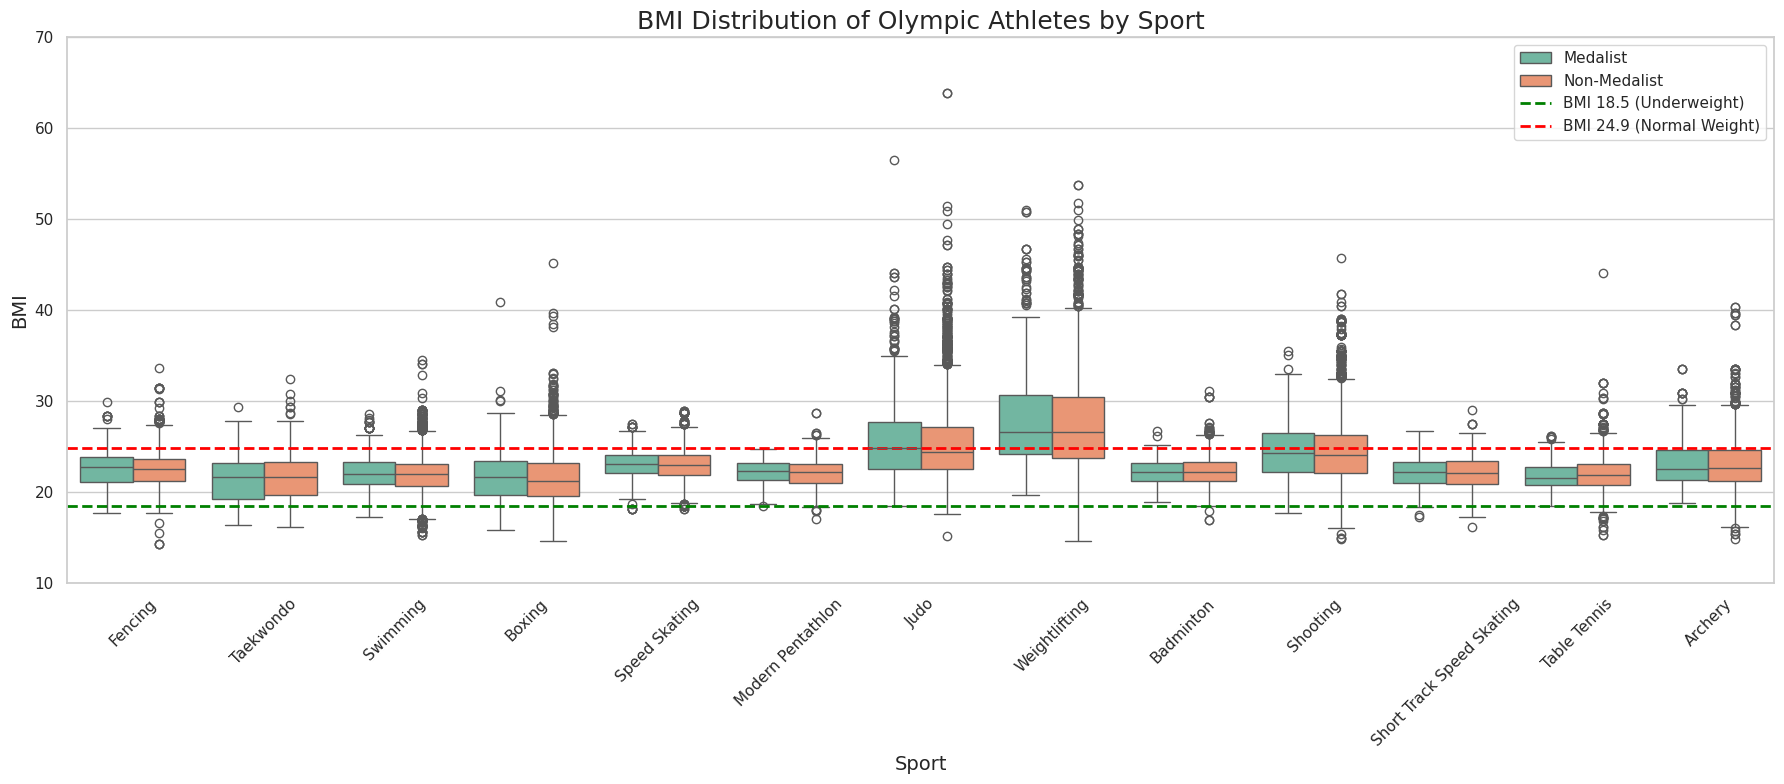

In [135]:
# 그래프 크기 및 스타일 설정
plt.figure(figsize=(18, 8))  # 전체 그래프의 크기
sns.set(style="whitegrid")

# y축 범위 설정
y_limit = (10, 70)

# Medalists와 Non-Medalists를 구분하기 위해 새로운 DataFrame 생성
df_combined = pd.concat([df_wc4.assign(Group='Medalist'), df_wc3.assign(Group='Non-Medalist')])

# Boxplot 그리기 (메달리스트와 비메달리스트 그룹을 구분하여 하나의 그래프에)
sns.boxplot(x='Sport', y='BMI', data=df_combined, hue='Group', palette='Set2')

# BMI 기준선을 위한 가이드라인 추가
plt.axhline(18.5, color='green', linestyle='--', linewidth=2, label='BMI 18.5 (Underweight)')
plt.axhline(24.9, color='red', linestyle='--', linewidth=2, label='BMI 24.9 (Normal Weight)')

# 제목 및 라벨 설정
plt.title('BMI Distribution of Olympic Athletes by Sport', fontsize=18)
plt.ylabel('BMI', fontsize=14)
plt.xlabel('Sport', fontsize=14)
plt.xticks(rotation=45)
plt.ylim(y_limit)  # y축 범위 설정

# 범례 표시
plt.legend()

# 그래프 출력
plt.tight_layout()
plt.show()


메달리스트 선수와 비메달리스트 선수의 극명한 차이가 보이지 않음

In [136]:
# Filter for Speed Skating events
df_SpeedSkating = df_wc4[df_wc4['Sport'] == 'Speed Skating']

# Define the custom event order for Speed Skating (both Men and Women)
SpeedSkating_event_order = [
    "Speed Skating Men's 500 metres",
    "Speed Skating Men's 1,000 metres",
    "Speed Skating Men's 1,500 metres",
    "Speed Skating Men's 5,000 metres",
    "Speed Skating Men's 10,000 metres",
    "Speed Skating Men's Team Pursuit (8 laps)",
    "Speed Skating Women's 500 metres",
    "Speed Skating Women's 1,000 metres",
    "Speed Skating Women's 1,500 metres",
    "Speed Skating Women's 3,000 metres",
    "Speed Skating Women's 5,000 metres",
    "Speed Skating Women's Team Pursuit (6 laps)"
]
# Ensure the data is sorted according to the custom event order
df_SpeedSkating_sorted = df_SpeedSkating.set_index('Event').loc[SpeedSkating_event_order].reset_index()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

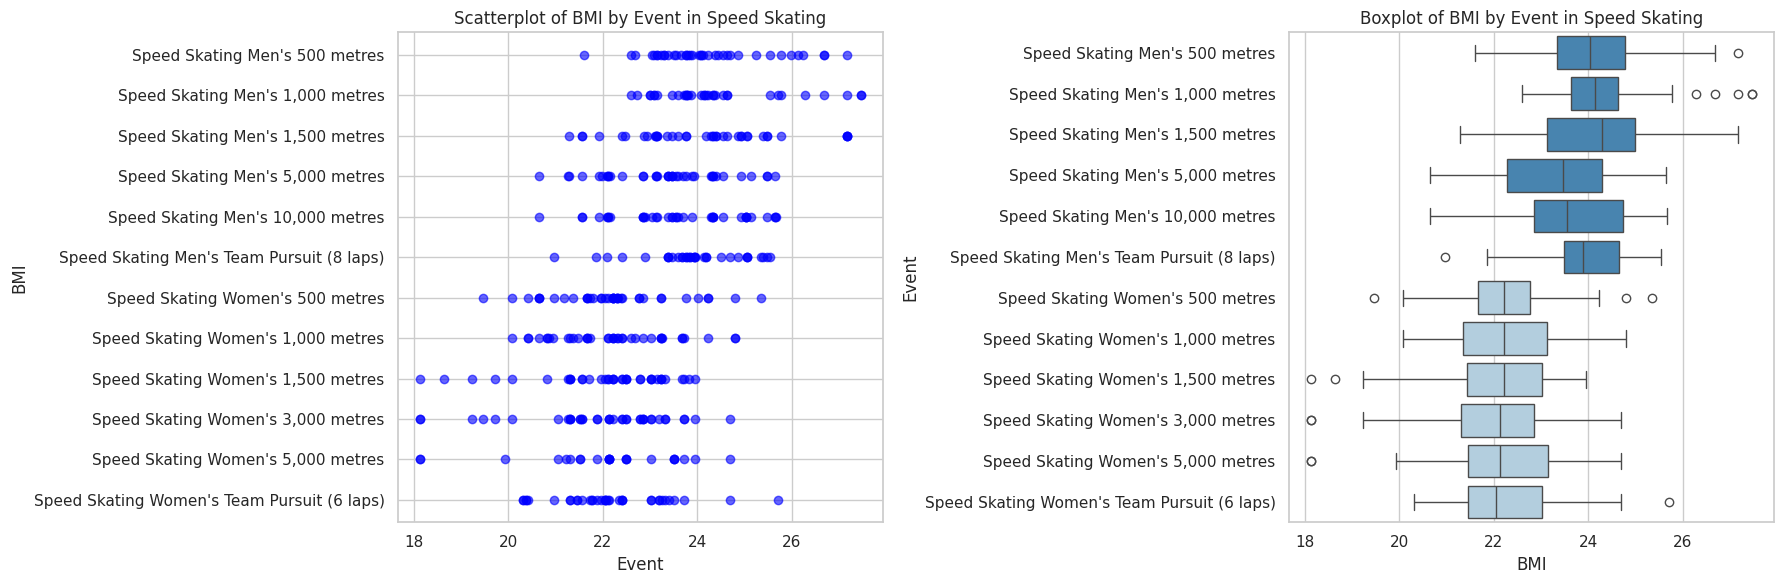

In [137]:
plt.figure(figsize=(18, 6))

# scatter plot for BMI by Event within Speed Skating
plt.subplot(1, 2, 1)  # 첫 번째 플롯
plt.scatter(df_SpeedSkating_sorted['BMI'], df_SpeedSkating_sorted['Event'], alpha=0.6, color='blue')
plt.title('Scatterplot of BMI by Event in Speed Skating')
plt.ylabel('BMI')
plt.xlabel('Event')
plt.xticks(rotation=0)
# Reverse the y-axis order
plt.gca().invert_yaxis()

# boxplot for BMI by Event within Speed Skating
plt.subplot(1, 2, 2)  # 첫 번째 플롯
sns.boxplot(x='BMI', y='Event', data=df_SpeedSkating_sorted, hue='Sex_M', palette='Blues', legend=False)

# Add titles and labels
plt.title('Boxplot of BMI by Event in Speed Skating')
plt.xlabel('BMI')
plt.ylabel('Event')

plt.tight_layout()
# Display the plot
plt.show()

In [138]:
# Filter for Taekwondo events
df_Taekwondo = df_wc4[df_wc4['Sport'] == 'Taekwondo']

Taekwondo_event_order =[
    "Taekwondo Men's Flyweight",
    "Taekwondo Men's Featherweight",
    "Taekwondo Men's Welterweight",
    "Taekwondo Men's Heavyweight",
    "Taekwondo Women's Flyweight",
    "Taekwondo Women's Featherweight",
    "Taekwondo Women's Welterweight",
    "Taekwondo Women's Heavyweight"
    ]

df_Taekwondo_sorted = df_Taekwondo.set_index('Event').loc[Taekwondo_event_order].reset_index()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

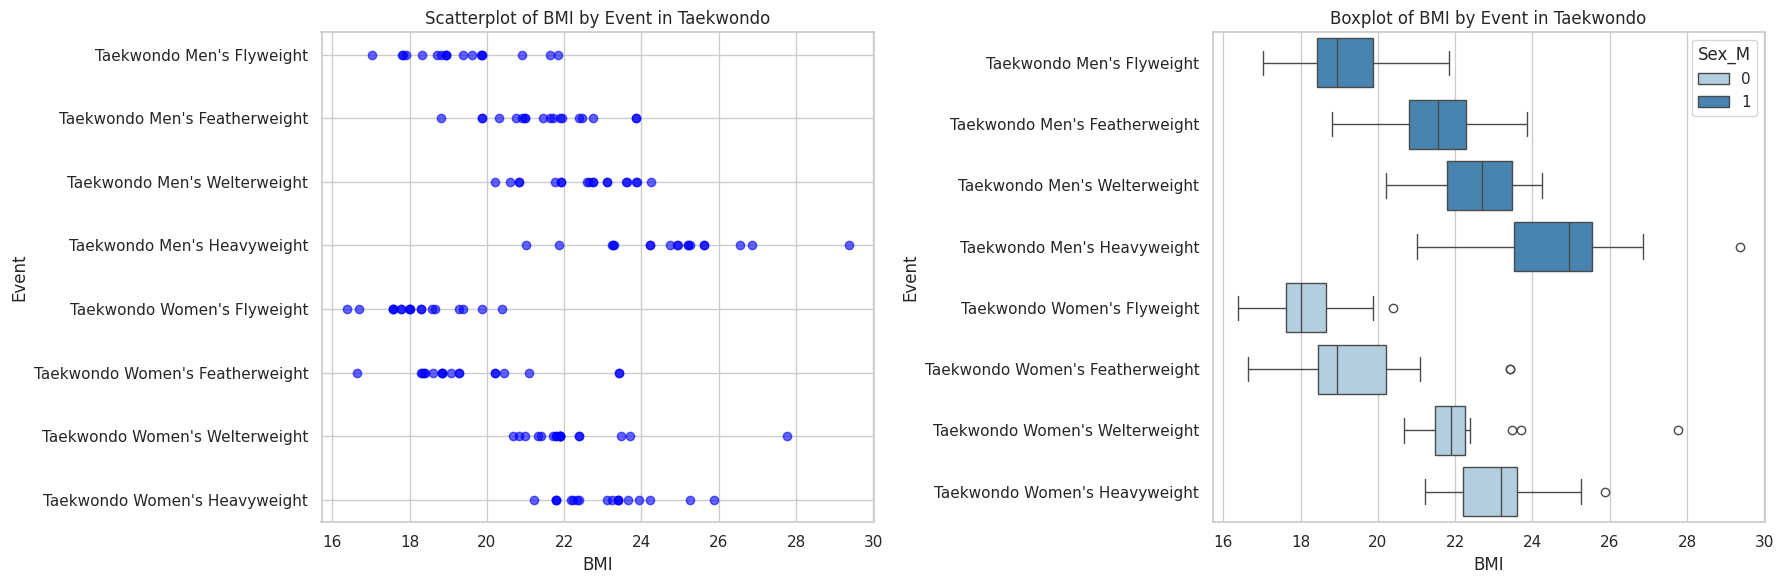

In [139]:
plt.figure(figsize=(18, 6))

# Scatter plot for BMI by Event within Taekwondo
plt.subplot(1, 2, 1)  # 첫 번째 플롯
plt.scatter(df_Taekwondo_sorted['BMI'], df_Taekwondo_sorted['Event'], alpha=0.6, color='blue')
plt.title('Scatterplot of BMI by Event in Taekwondo')
plt.xlabel('BMI')
plt.ylabel('Event')
plt.xticks(rotation=0)

# Reverse the y-axis order
plt.gca().invert_yaxis()

# Boxplot for BMI by Event within Taekwondo
plt.subplot(1, 2, 2)  # 두 번째 플롯
sns.boxplot(x='BMI', y='Event', data=df_Taekwondo_sorted, hue='Sex_M', palette='Blues')

# Add titles and labels
plt.title('Boxplot of BMI by Event in Taekwondo')
plt.xlabel('BMI')
plt.ylabel('Event')

# Adjust layout for better display
plt.tight_layout()

# Display the plot
plt.show()

In [140]:
# Taekwondo 데이터에서 남자와 여자 데이터 분리
men_taekwondo = df_wc4[(df_wc4['Sport'] == 'Taekwondo') & (df_wc4['Sex_M'] == 1)][['Height', 'Weight']]
women_taekwondo = df_wc4[(df_wc4['Sport'] == 'Taekwondo') & (df_wc4['Sex_M'] == 0)][['Height', 'Weight']]

# 남자와 여자의 키와 몸무게 중앙값 계산
men_median = men_taekwondo.median()
women_median = women_taekwondo.median()

# 결과 출력
print(f"Median Height for Men's Taekwondo: {men_median['Height']}")
print(f"Median Weight for Men's Taekwondo: {men_median['Weight']}")
print(f"Median Height for Women's Taekwondo: {women_median['Height']}")
print(f"Median Weight for Women's Taekwondo: {women_median['Weight']}")

Median Height for Men's Taekwondo: 184.5
Median Weight for Men's Taekwondo: 79.0
Median Height for Women's Taekwondo: 173.0
Median Weight for Women's Taekwondo: 60.5


In [141]:
# SpeedSkating 종목의 데이터를 Event별로 그룹화하여 통계 계산
SpeedSkating_stats = df_SpeedSkating.groupby('Event')['BMI'].agg(['mean', 'median', 'min', 'max', 'std', 'count'])

# 결과 출력
print(SpeedSkating_stats)

                                                  mean  median    min    max  \
Event                                                                          
Speed Skating Men's 1,000 metres             24.412941  24.150  22.60  27.46   
Speed Skating Men's 1,500 metres             24.134872  24.280  21.28  27.17   
Speed Skating Men's 10,000 metres            23.646154  23.550  20.65  25.66   
Speed Skating Men's 5,000 metres             23.343077  23.460  20.65  25.64   
Speed Skating Men's 500 metres               24.249487  24.030  21.61  27.17   
Speed Skating Men's Team Pursuit (8 laps)    23.911471  23.880  20.96  25.54   
Speed Skating Women's 1,000 metres           22.216923  22.220  20.08  24.80   
Speed Skating Women's 1,500 metres           22.044615  22.220  18.13  23.95   
Speed Skating Women's 3,000 metres           21.931026  22.140  18.13  24.68   
Speed Skating Women's 5,000 metres           22.030833  22.140  18.13  24.68   
Speed Skating Women's 500 metres        

<ipython-input-142-9f8c6b3fd0de>:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_SpeedSkating_normalized = df_SpeedSkating.groupby('Event').apply(normalize_bmi)
<ipython-input-142-9f8c6b3fd0de>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Normalized_BMI', y='Event', data=df_SpeedSkating_normalized, palette='Set2', inner='quartile')


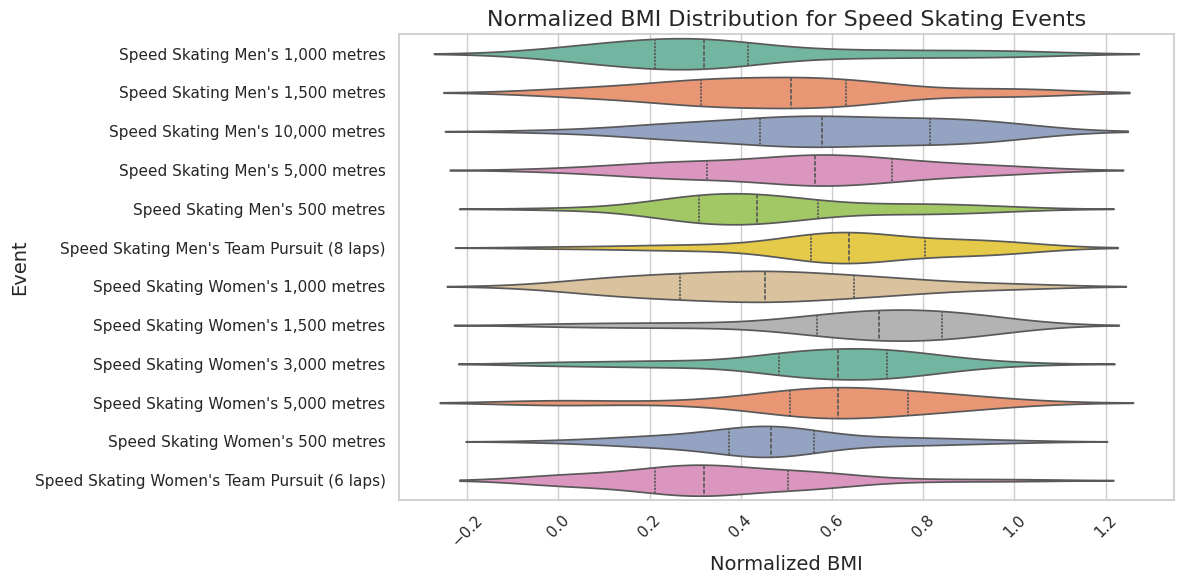

In [142]:
# 쇼트트랙 종목의 데이터만 필터링
df_SpeedSkating = df_wc4[df_wc4['Sport'] == 'Speed Skating']

# Event별로 BMI 값 정규화
def normalize_bmi(group):
    group['Normalized_BMI'] = (group['BMI'] - group['BMI'].min()) / (group['BMI'].max() - group['BMI'].min())
    return group

df_SpeedSkating_normalized = df_SpeedSkating.groupby('Event').apply(normalize_bmi)

# 그래프 크기 조정 및 스타일 설정
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Violinplot으로 Event별 정규화된 BMI 분포 시각화
sns.violinplot(x='Normalized_BMI', y='Event', data=df_SpeedSkating_normalized, palette='Set2', inner='quartile')

# 그래프 제목과 축 레이블 설정
plt.title('Normalized BMI Distribution for Speed Skating Events', fontsize=16)
plt.ylabel('Event', fontsize=14)
plt.xlabel('Normalized BMI', fontsize=14)

# x축 눈금 회전으로 가독성 향상
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [143]:
# Taekwondo 종목의 데이터를 Event별로 그룹화하여 통계 계산
taekwondo_stats = df_Taekwondo.groupby('Event')['BMI'].agg(['mean', 'median', 'min', 'max', 'std', 'count'])

# 결과 출력
print(taekwondo_stats)

                                      mean  median    min    max       std  \
Event                                                                        
Taekwondo Men's Featherweight    21.468333  21.545  18.81  23.85  1.330777   
Taekwondo Men's Flyweight        19.230000  18.940  17.02  21.83  1.302933   
Taekwondo Men's Heavyweight      24.746667  24.935  21.00  29.36  1.889220   
Taekwondo Men's Welterweight     22.457222  22.690  20.20  24.25  1.234007   
Taekwondo Women's Featherweight  19.527778  18.950  16.65  23.42  1.731635   
Taekwondo Women's Flyweight      18.227778  18.000  16.37  20.40  1.024957   
Taekwondo Women's Heavyweight    23.067222  23.180  21.22  25.88  1.242312   
Taekwondo Women's Welterweight   22.200556  21.880  20.68  27.77  1.592096   

                                 count  
Event                                   
Taekwondo Men's Featherweight       18  
Taekwondo Men's Flyweight           18  
Taekwondo Men's Heavyweight         18  
Taekwondo Men'

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


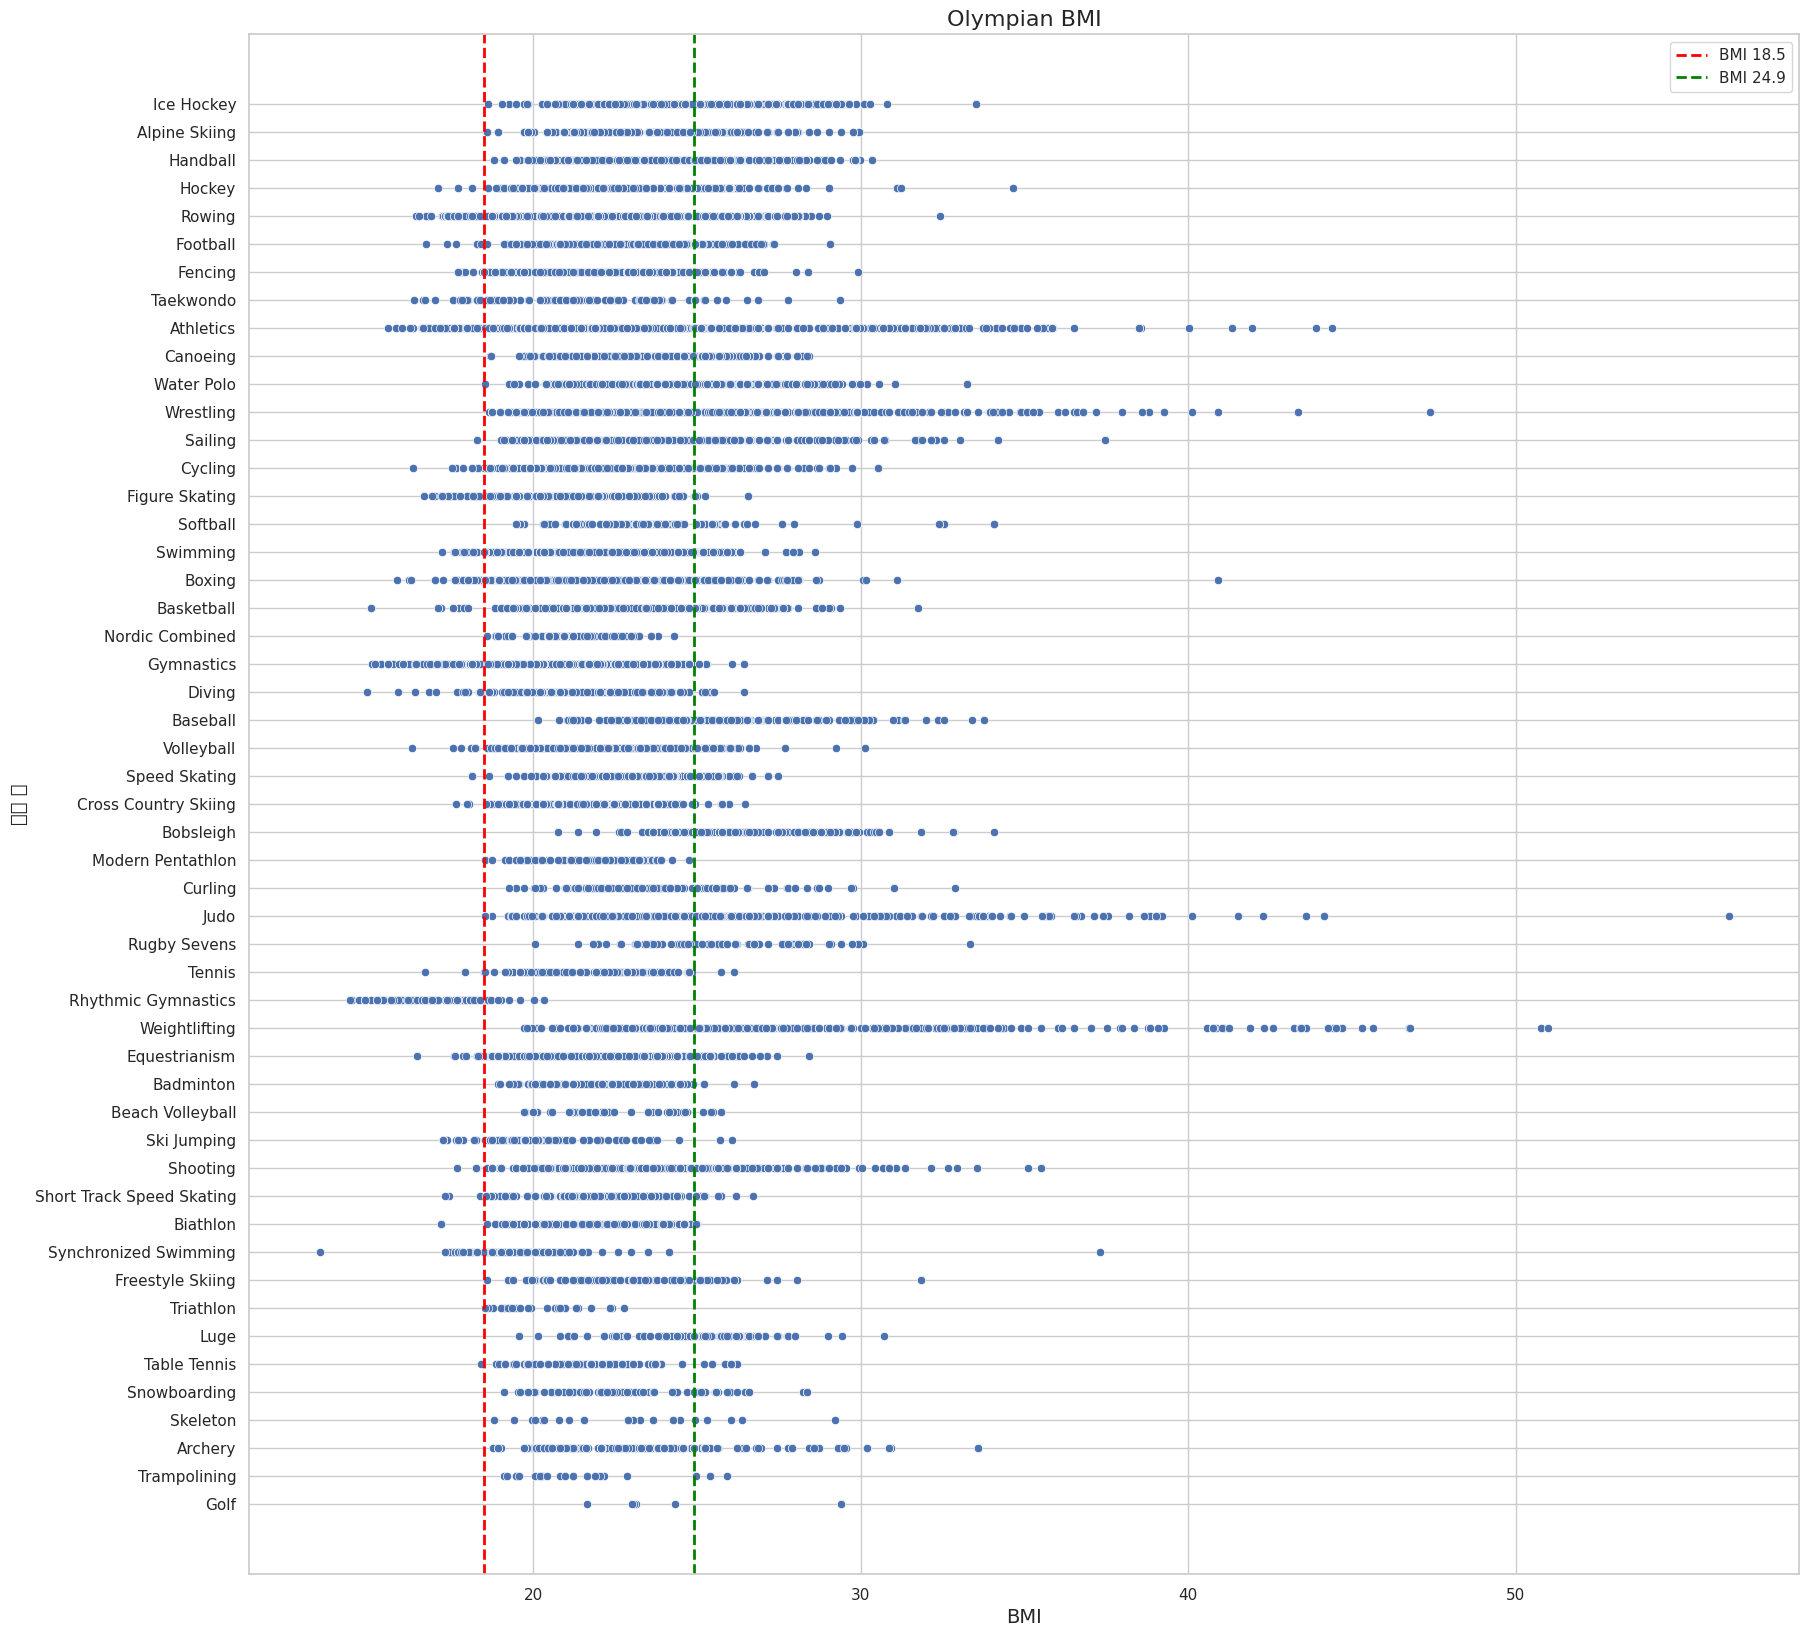

In [144]:
# 메달 딴 사람들 종목 모두 나타낸것
plt.figure(figsize=(20, 20))
sns.scatterplot(x='BMI', y='Sport', data=df_wc2)

plt.axvline(18.5, color='red', linestyle='--', linewidth=2, label='BMI 18.5')  # 라인 그리기
plt.axvline(24.9, color='green', linestyle='--', linewidth=2, label='BMI 24.9')

plt.title('Olympian BMI', fontsize=16)
plt.xlabel('BMI', fontsize=14)
plt.ylabel('선수 수', fontsize=14)
plt.legend()
plt.show()


<ipython-input-145-cbb6c3c12c5f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='BMI', y='Sport', data=df_wc, palette='Set2', inner='quartile')


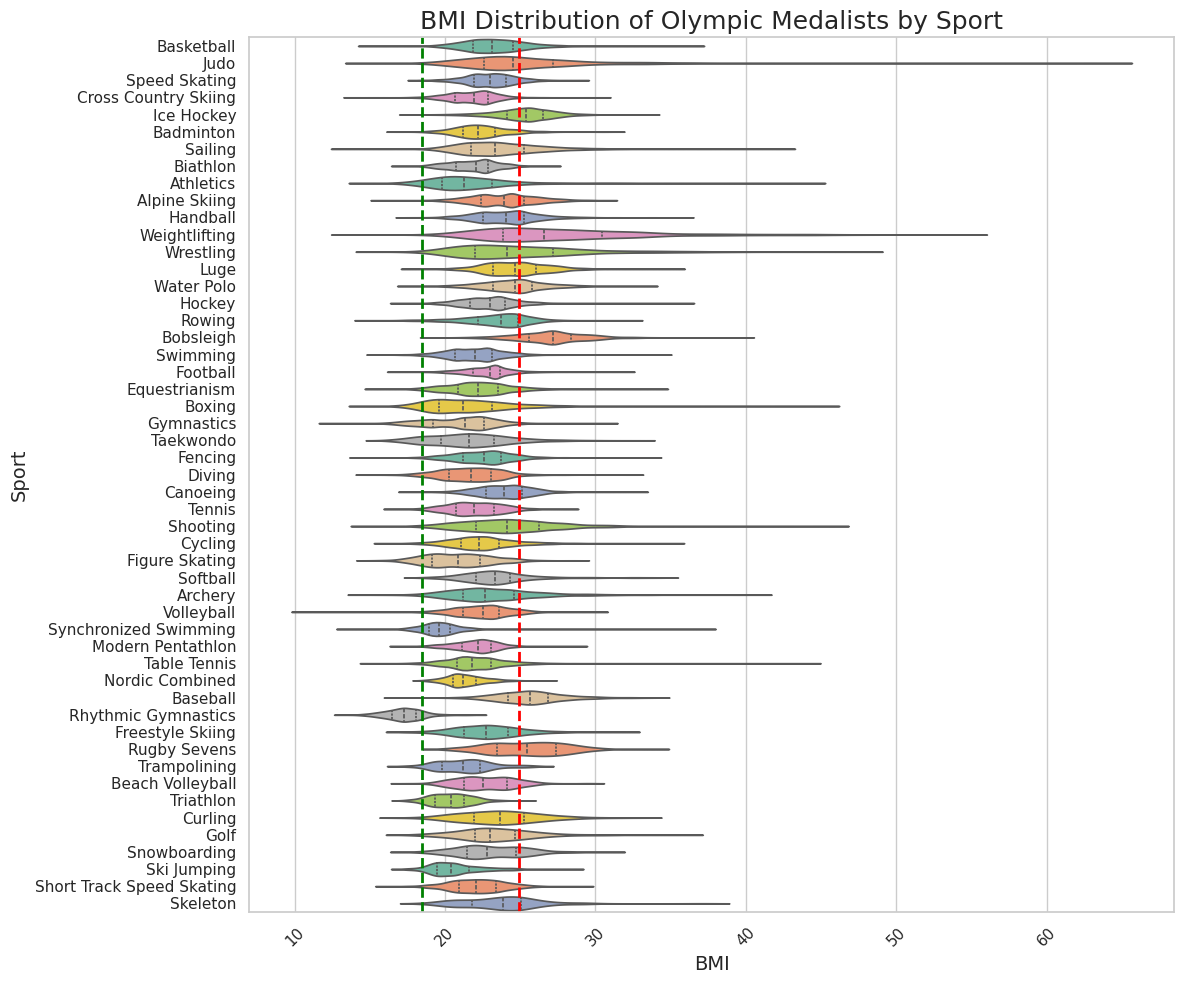

In [145]:
# 그래프 크기 조정 및 스타일 설정
plt.figure(figsize=(12, 10))
sns.set(style="whitegrid")

# Violinplot으로 종목별 BMI 분포 시각화
sns.violinplot(x='BMI', y='Sport', data=df_wc, palette='Set2', inner='quartile')

# BMI 18.5와 24.9에 기준선 추가 (저체중, 정상체중)
plt.axvline(18.5, color='green', linestyle='--', linewidth=2, label='BMI 18.5 (Underweight)')
plt.axvline(24.9, color='red', linestyle='--', linewidth=2, label='BMI 24.9 (Normal Weight)')

# 그래프 제목과 축 레이블 설정
plt.title('BMI Distribution of Olympic Medalists by Sport', fontsize=18)
plt.ylabel('Sport', fontsize=14)
plt.xlabel('BMI', fontsize=14)

# x축 눈금 회전으로 가독성 향상
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

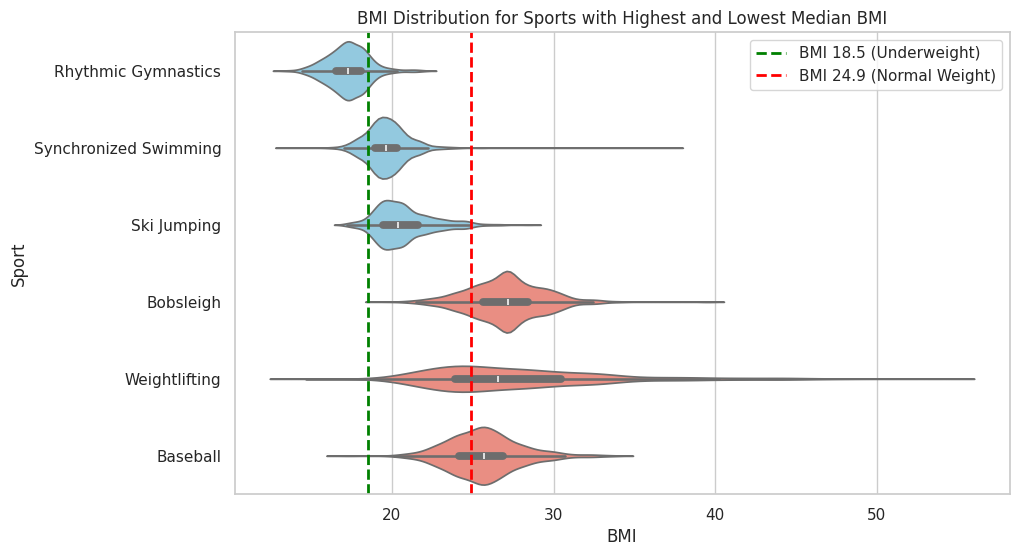

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sport별 BMI 중앙값 계산
median_bmi_by_sport = df_wc.groupby('Sport')['BMI'].median()

# BMI 중앙값이 낮은 3종목과 높은 3종목 추출
top_3 = median_bmi_by_sport.nsmallest(3).index
bottom_3 = median_bmi_by_sport.nlargest(3).index

# 선택된 종목의 데이터만 필터링 (top_3 and bottom_3)
top_3_df = df_wc[df_wc['Sport'].isin(top_3)]
bottom_3_df = df_wc[df_wc['Sport'].isin(bottom_3)]

# 바이올린 플롯 생성 (x축과 y축을 바꿈)
plt.figure(figsize=(10, 6))
sns.violinplot(x='BMI', y='Sport', data=top_3_df, order=top_3, color='skyblue')
sns.violinplot(x='BMI', y='Sport', data=bottom_3_df, order=bottom_3, color='salmon')

# BMI 18.5와 24.9에 기준선 추가
plt.axvline(18.5, color='green', linestyle='--', linewidth=2, label='BMI 18.5 (Underweight)')
plt.axvline(24.9, color='red', linestyle='--', linewidth=2, label='BMI 24.9 (Normal Weight)')

plt.title('BMI Distribution for Sports with Highest and Lowest Median BMI')
plt.legend()
plt.show()

In [147]:
# 필터링할 Taekwondo 이벤트 목록
events_to_filter = [
    "Taekwondo Men's Flyweight",
    "Taekwondo Men's Featherweight",
    "Taekwondo Men's Welterweight",
    "Taekwondo Men's Heavyweight"
]

# Event가 해당 목록에 포함된 데이터 필터링
df_taekwondo_men = df_wc4[df_wc4['Event'].isin(events_to_filter)]

# 각 체급별로 Height, Weight, BMI 통계 계산
taekwondo_stats = df_taekwondo_men.groupby('Event')[['Height', 'Weight', 'BMI']].agg(['mean', 'median', 'min', 'max', 'std', 'count'])

# 결과 출력
print(taekwondo_stats)

                                   Height                                 \
                                     mean median    min    max       std   
Event                                                                      
Taekwondo Men's Featherweight  180.000000  180.5  172.0  191.0  4.910972   
Taekwondo Men's Flyweight      177.722222  177.0  163.0  188.0  6.387539   
Taekwondo Men's Heavyweight    194.222222  193.5  180.0  207.0  7.050703   
Taekwondo Men's Welterweight   189.388889  189.5  182.0  199.0  5.293046   

                                        Weight                                \
                              count       mean median   min    max       std   
Event                                                                          
Taekwondo Men's Featherweight    18  69.555556   68.0  63.0   83.0  5.260533   
Taekwondo Men's Flyweight        18  60.666667   58.0  57.0   70.0  4.228753   
Taekwondo Men's Heavyweight      18  93.277778   92.0  78.0  106.0 

In [148]:
# 선수 정보
player_name = "Donggyu Kim"
height = 189
weight = 80
bmi = weight / (height / 100) ** 2  # BMI 계산

# 결과 출력
print(f"Player: {player_name}")
print(f"Height: {height} cm")
print(f"Weight: {weight} kg")
print(f"BMI: {bmi:.2f}")

Player: Donggyu Kim
Height: 189 cm
Weight: 80 kg
BMI: 22.40


<ipython-input-149-76a2ed7db698>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='BMI', y='Event', data=men_events, palette='Blues', order=event_order)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 t

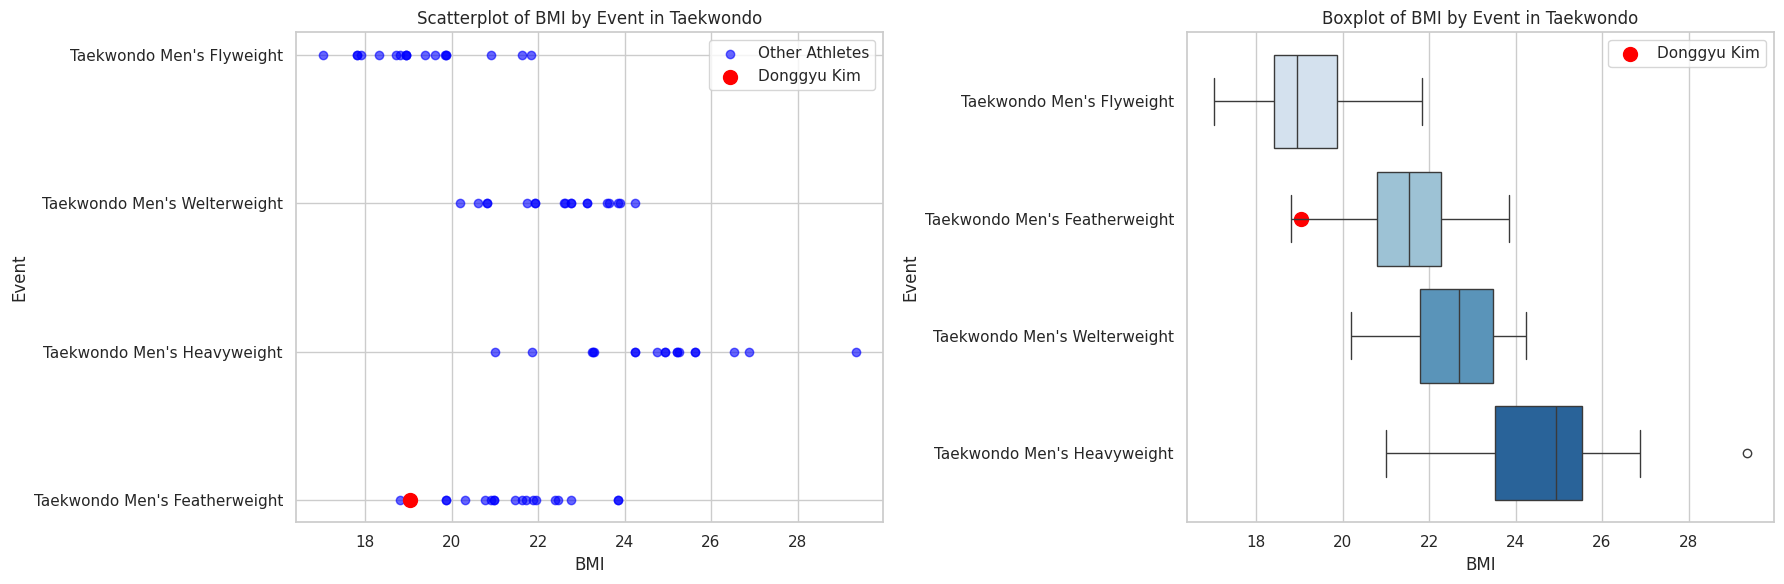

In [149]:
# Donggyu Kim 선수의 페더급 페더급 정보
player_name = "Donggyu Kim"
height = 189
weight = 68
bmi = weight / (height / 100) ** 2  # BMI 계산

# Filter for Taekwondo events
df_Taekwondo = df_wc4[df_wc4['Sport'] == 'Taekwondo']

# Men's events만 필터링
men_events = df_Taekwondo[df_Taekwondo['Event'].str.contains("Men's")]

# 원하는 순서로 이벤트 설정
event_order = [
    "Taekwondo Men's Flyweight",
    "Taekwondo Men's Featherweight",
    "Taekwondo Men's Welterweight",
    "Taekwondo Men's Heavyweight"
]

plt.figure(figsize=(18, 6))

# Scatter plot for BMI by Event within Taekwondo
plt.subplot(1, 2, 1)  # 첫 번째 플롯
plt.scatter(men_events['BMI'], men_events['Event'], alpha=0.6, color='blue', label='Other Athletes')
plt.scatter(bmi, "Taekwondo Men's Featherweight", color='red', s=100, label=player_name)  # 선수 추가
plt.title('Scatterplot of BMI by Event in Taekwondo')
plt.xlabel('BMI')
plt.ylabel('Event')
plt.yticks(event_order)  # Y축 순서 지정
plt.legend()

# Boxplot for BMI by Event within Taekwondo
plt.subplot(1, 2, 2)  # 두 번째 플롯
sns.boxplot(x='BMI', y='Event', data=men_events, palette='Blues', order=event_order)
plt.scatter(bmi, "Taekwondo Men's Featherweight", color='red', s=100, label=player_name)  # 선수 추가

# Add titles and labels
plt.title('Boxplot of BMI by Event in Taekwondo')
plt.xlabel('BMI')
plt.ylabel('Event')
plt.yticks(event_order)  # Y축 순서 지정
plt.legend()

# Adjust layout for better display
plt.tight_layout()

# Display the plot
plt.show()

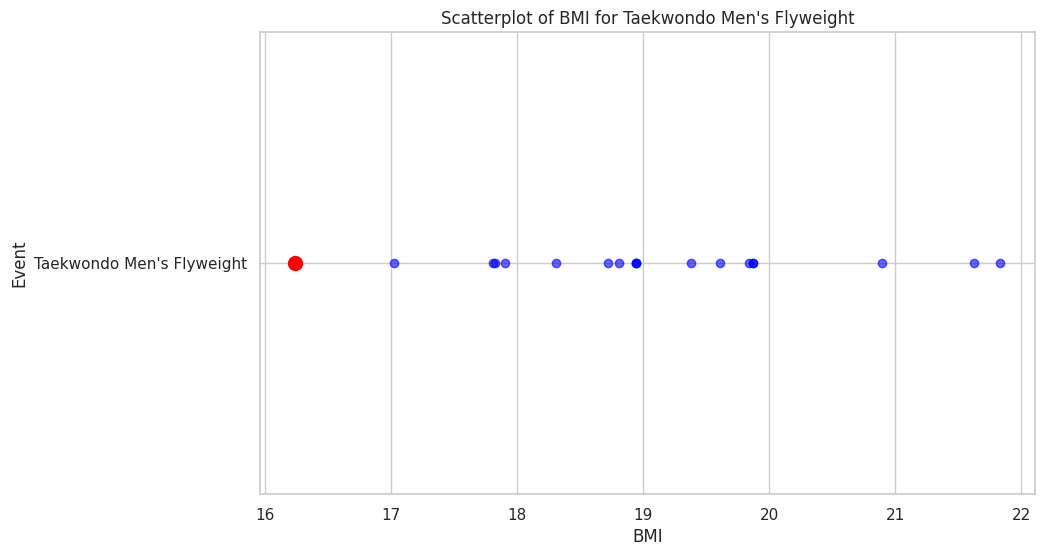

<ipython-input-150-35afdfff9485>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='BMI', y='Event', data=flyweight_data, palette='Blues')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


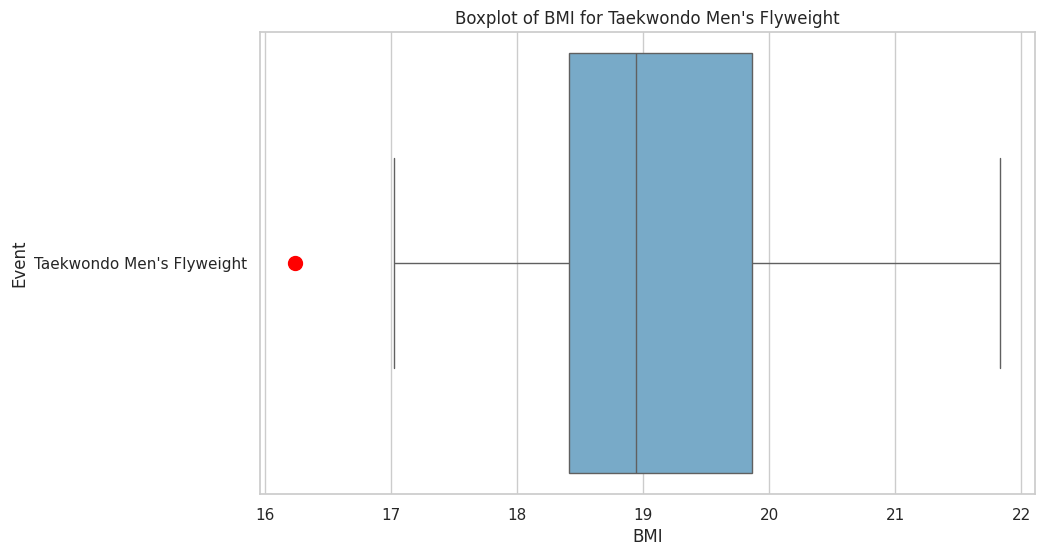

In [150]:
# Donggyu Kim 선수의 페더급 페더급 정보
player_name = "Donggyu Kim"
height = 189
weight = 58
bmi = weight / (height / 100) ** 2  # BMI 계산

# flyweight 이벤트만 필터링
flyweight_data = df_taekwondo_men[df_taekwondo_men['Event'] == "Taekwondo Men's Flyweight"]

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(flyweight_data['BMI'], flyweight_data['Event'], alpha=0.6, color='blue')
plt.title('Scatterplot of BMI for Taekwondo Men\'s Flyweight')
plt.scatter(bmi, "Taekwondo Men's Flyweight", color='red', s=100, label=player_name)  # 선수 추가

plt.xlabel('BMI')
plt.ylabel('Event')
plt.show()

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='BMI', y='Event', data=flyweight_data, palette='Blues')
plt.title('Boxplot of BMI for Taekwondo Men\'s Flyweight')
plt.scatter(bmi, "Taekwondo Men's Flyweight", color='red', s=100, label=player_name)  # 선수 추가

plt.xlabel('BMI')
plt.ylabel('Event')
plt.show()


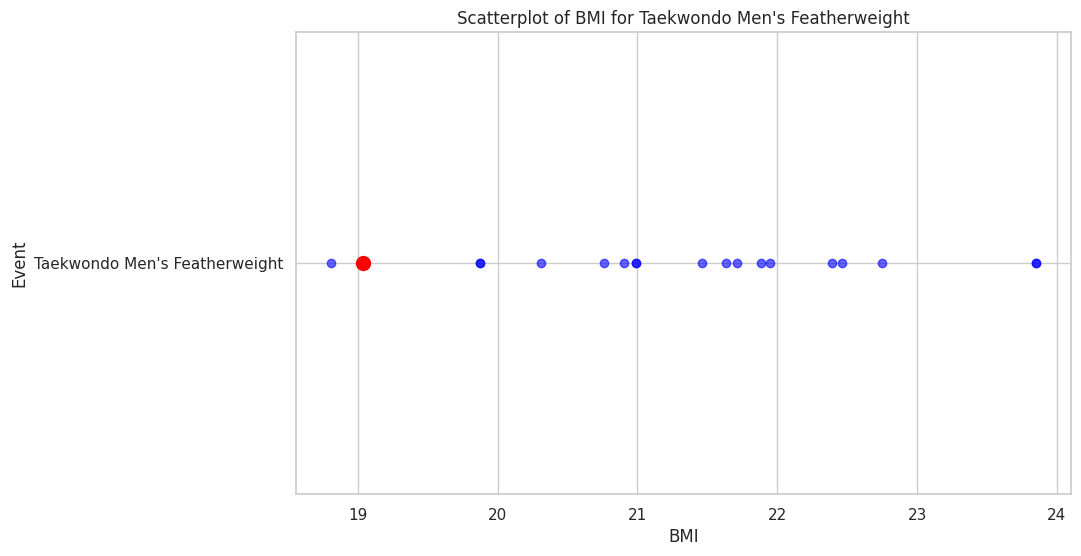

<ipython-input-151-e91aa4396686>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='BMI', y='Event', data=featherweight_data, palette='Blues')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


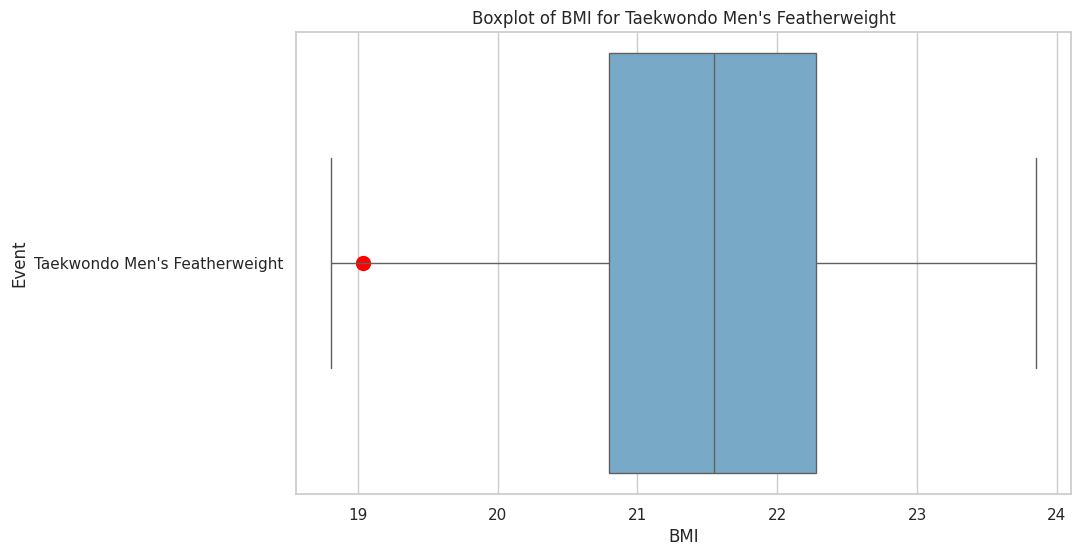

In [151]:
# Donggyu Kim 선수의 페더급 페더급 정보
player_name = "Donggyu Kim"
height = 189
weight = 68
bmi = weight / (height / 100) ** 2  # BMI 계산

# Featherweight 이벤트만 필터링
featherweight_data = df_taekwondo_men[df_taekwondo_men['Event'] == "Taekwondo Men's Featherweight"]

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(featherweight_data['BMI'], featherweight_data['Event'], alpha=0.6, color='blue')
plt.title('Scatterplot of BMI for Taekwondo Men\'s Featherweight')
plt.scatter(bmi, "Taekwondo Men's Featherweight", color='red', s=100, label=player_name)  # 선수 추가
plt.xlabel('BMI')
plt.ylabel('Event')
plt.show()

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='BMI', y='Event', data=featherweight_data, palette='Blues')
plt.title('Boxplot of BMI for Taekwondo Men\'s Featherweight')
plt.scatter(bmi, "Taekwondo Men's Featherweight", color='red', s=100, label=player_name)  # 선수 추가
plt.xlabel('BMI')
plt.ylabel('Event')
plt.show()

In [152]:
# 가장 낮은 BMI를 가진 선수 정보 추출
min_bmi_player = featherweight_data.loc[featherweight_data['BMI'].idxmin()]

# 해당 선수 정보 출력
print("가장 낮은 BMI를 가진 선수 정보:")
print(min_bmi_player)

가장 낮은 BMI를 가진 선수 정보:
Sport                         Taekwondo
Event     Taekwondo Men's Featherweight
Medal                            Bronze
BMI                               18.81
Height                            183.0
Weight                             63.0
NOC                                 AFG
Year                               2012
Season                           Summer
Sex_M                                 1
Name: 171762, dtype: object


<ipython-input-153-69123b1b2e2c>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='BMI', y='Event', data=men_events, palette='Blues', order=event_order)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 t

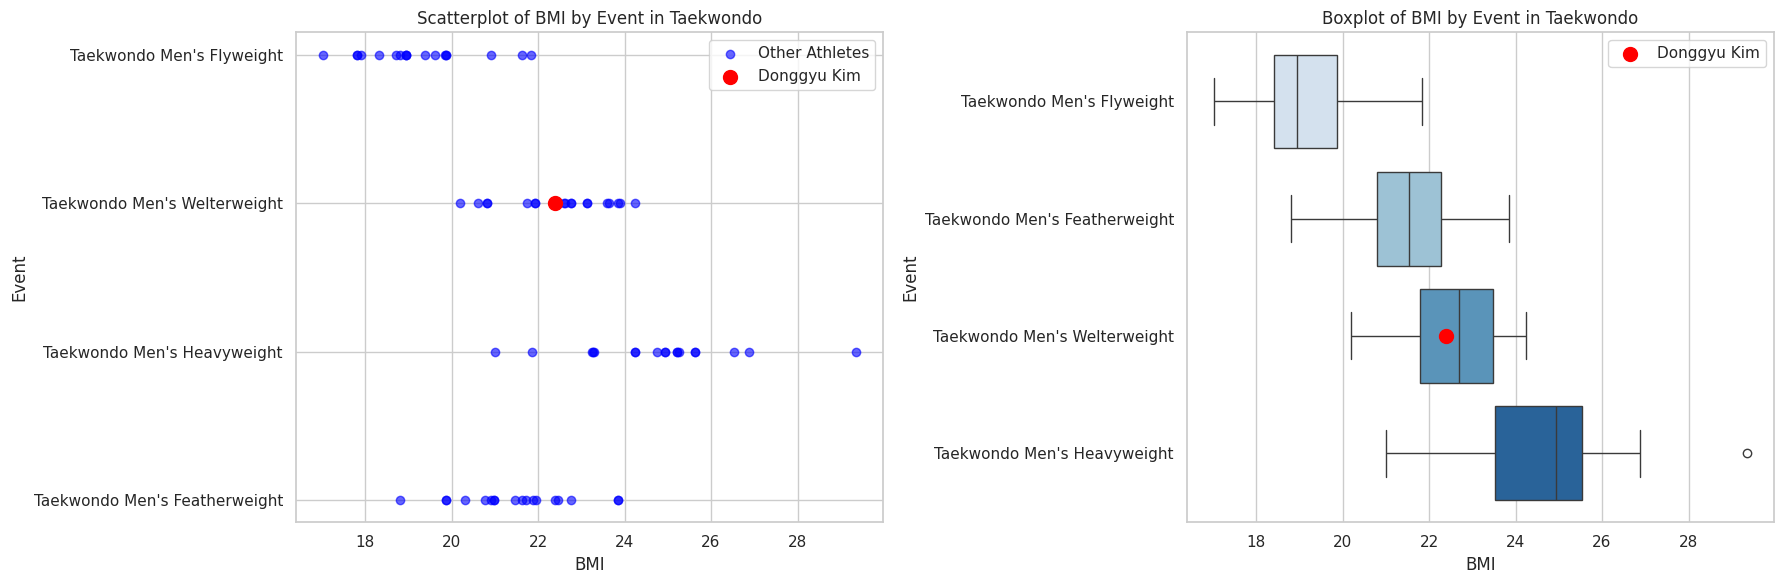

In [153]:
# Donggyu Kim 선수의 웰터급 정보
player_name = "Donggyu Kim"
height = 189
weight = 80
bmi = weight / (height / 100) ** 2  # BMI 계산

plt.figure(figsize=(18, 6))

# 첫 번째 플롯: Scatter plot for BMI by Event within Taekwondo
plt.subplot(1, 2, 1)
plt.scatter(men_events['BMI'], men_events['Event'], alpha=0.6, color='blue', label='Other Athletes')
plt.scatter(bmi, "Taekwondo Men's Welterweight", color='red', s=100, label=player_name, zorder=5)  # zorder 추가
plt.title('Scatterplot of BMI by Event in Taekwondo')
plt.xlabel('BMI')
plt.ylabel('Event')
plt.yticks(event_order)  # Y축 순서 지정
plt.legend()

# 두 번째 플롯: Boxplot for BMI by Event within Taekwondo
plt.subplot(1, 2, 2)
sns.boxplot(x='BMI', y='Event', data=men_events, palette='Blues', order=event_order)
plt.scatter(bmi, "Taekwondo Men's Welterweight", color='red', s=100, label=player_name, zorder=5)  # zorder 추가

# Add titles and labels
plt.title('Boxplot of BMI by Event in Taekwondo')
plt.xlabel('BMI')
plt.ylabel('Event')
plt.yticks(event_order)  # Y축 순서 지정
plt.legend()

# 레이아웃 조정
plt.tight_layout()

# 그래프 출력
plt.show()

<Figure size 1800x600 with 0 Axes>

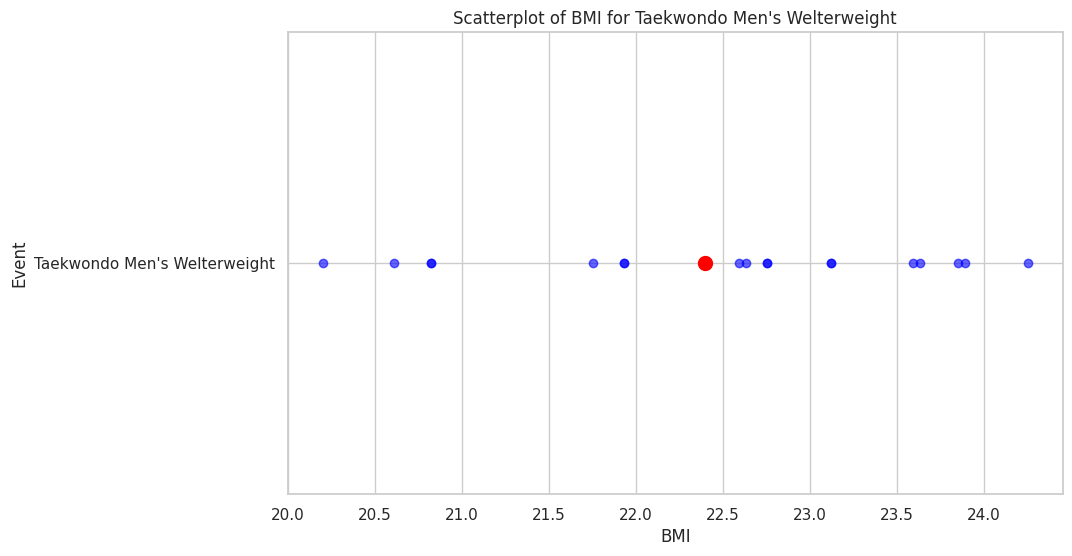

<ipython-input-154-23683b8e4c48>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='BMI', y='Event', data=welterweight_data, palette='Blues')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


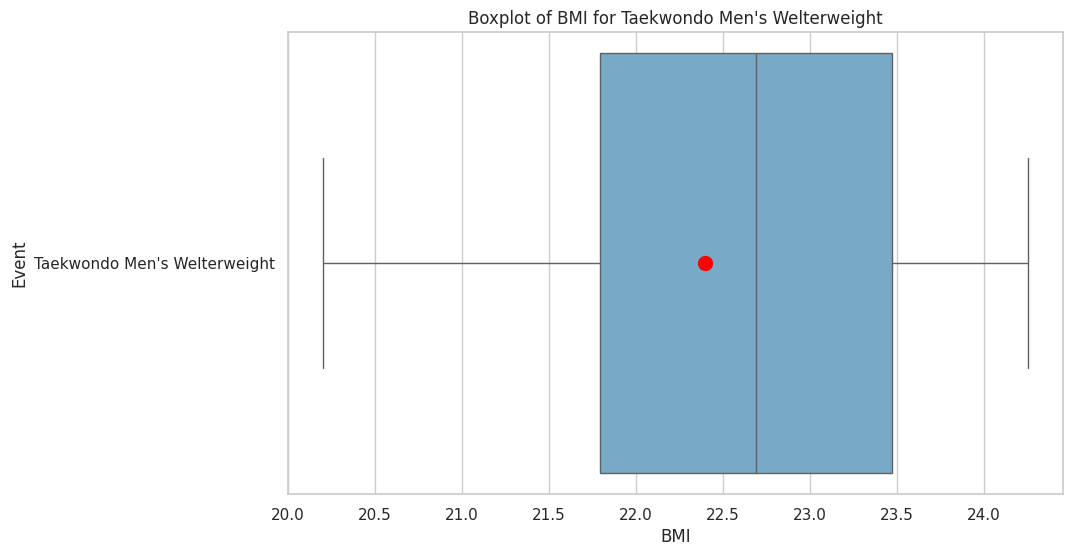

In [154]:
# Donggyu Kim 선수의 웰터급 정보
player_name = "Donggyu Kim"
height = 189
weight = 80
bmi = weight / (height / 100) ** 2  # BMI 계산

plt.figure(figsize=(18, 6))

# welterweight 이벤트만 필터링
welterweight_data = df_taekwondo_men[df_taekwondo_men['Event'] == "Taekwondo Men's Welterweight"]

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(welterweight_data['BMI'], welterweight_data['Event'], alpha=0.6, color='blue')
plt.title('Scatterplot of BMI for Taekwondo Men\'s Welterweight')
plt.scatter(bmi, "Taekwondo Men's Welterweight", color='red', s=100, label=player_name, zorder=5)  # zorder 추가
plt.xlabel('BMI')
plt.ylabel('Event')
plt.show()

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='BMI', y='Event', data=welterweight_data, palette='Blues')
plt.title('Boxplot of BMI for Taekwondo Men\'s Welterweight')
plt.scatter(bmi, "Taekwondo Men's Welterweight", color='red', s=100, label=player_name, zorder=5)  # zorder 추가
plt.xlabel('BMI')
plt.ylabel('Event')
plt.show()

<ipython-input-155-08fdb501d8cc>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='BMI', y='Event', data=men_events, palette='Blues', order=event_order)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 t

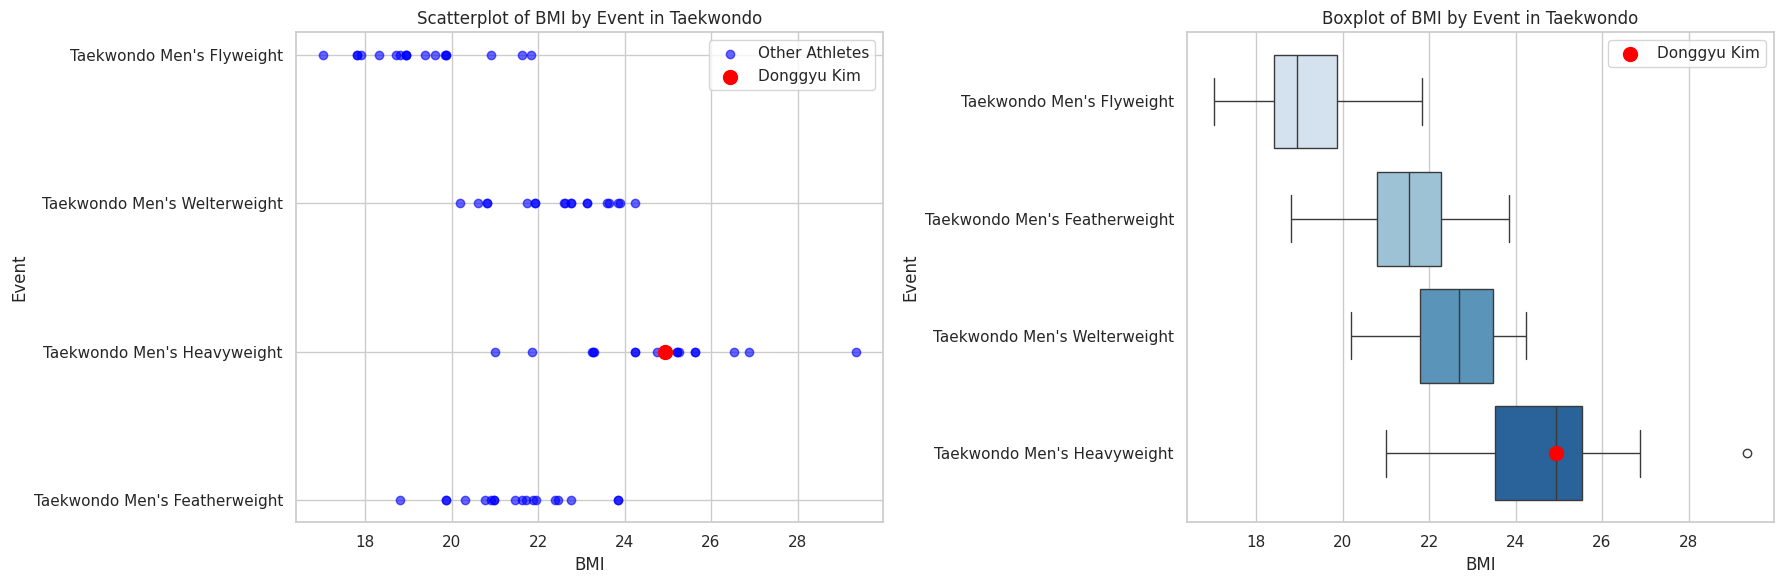

In [155]:
# Donggyu Kim 선수의 헤비급 정보
player_name = "Donggyu Kim"
height = 189
weight = 89.07
bmi = weight / (height / 100) ** 2  # BMI 계산

plt.figure(figsize=(18, 6))

# 첫 번째 플롯: Scatter plot for BMI by Event within Taekwondo
plt.subplot(1, 2, 1)
plt.scatter(men_events['BMI'], men_events['Event'], alpha=0.6, color='blue', label='Other Athletes')
plt.scatter(bmi, "Taekwondo Men's Heavyweight", color='red', s=100, label=player_name, zorder=5)  # zorder 추가
plt.title('Scatterplot of BMI by Event in Taekwondo')
plt.xlabel('BMI')
plt.ylabel('Event')
plt.yticks(event_order)  # Y축 순서 지정
plt.legend()

# 두 번째 플롯: Boxplot for BMI by Event within Taekwondo
plt.subplot(1, 2, 2)
sns.boxplot(x='BMI', y='Event', data=men_events, palette='Blues', order=event_order)
plt.scatter(bmi, "Taekwondo Men's Heavyweight", color='red', s=100, label=player_name, zorder=5)  # zorder 추가

# Add titles and labels
plt.title('Boxplot of BMI by Event in Taekwondo')
plt.xlabel('BMI')
plt.ylabel('Event')
plt.yticks(event_order)  # Y축 순서 지정
plt.legend()

# 레이아웃 조정
plt.tight_layout()

# 그래프 출력
plt.show()

<Figure size 1800x600 with 0 Axes>

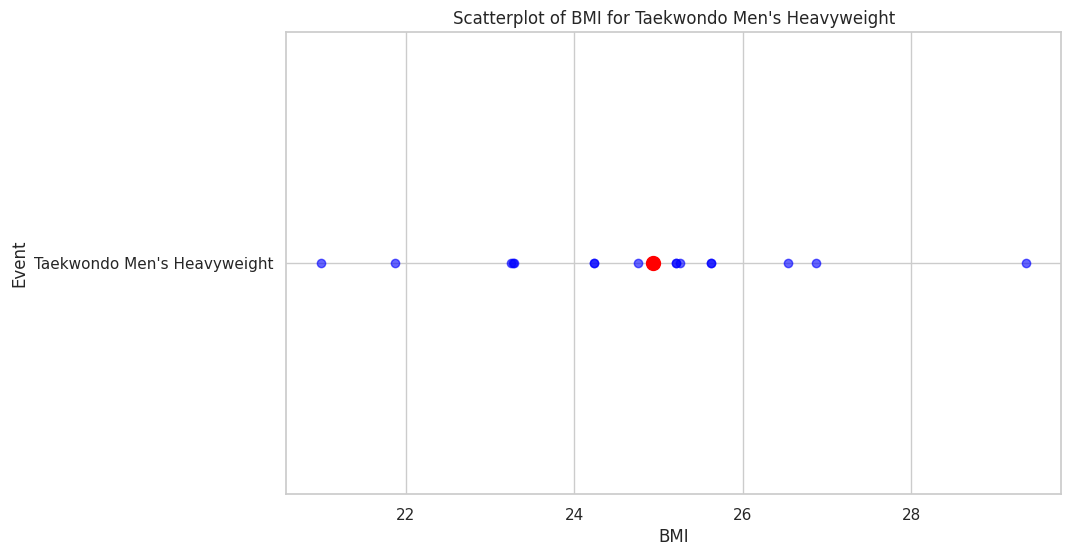

<ipython-input-156-c46d1a174430>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='BMI', y='Event', data=heavyweight_data, palette='Blues')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


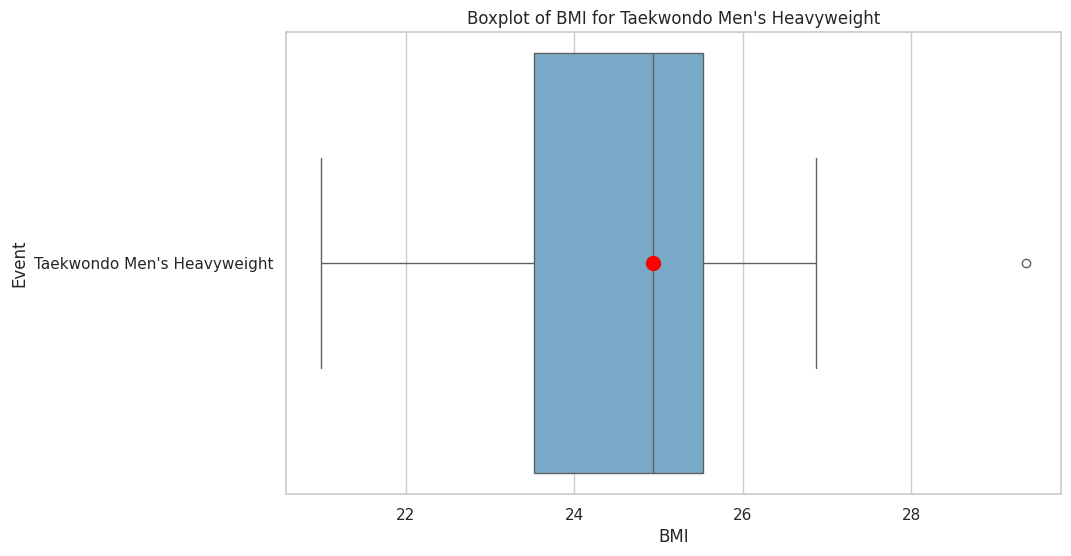

In [156]:
# Donggyu Kim 선수의 헤비급 정보
player_name = "Donggyu Kim"
height = 189
weight = 89.07
bmi = weight / (height / 100) ** 2  # BMI 계산

plt.figure(figsize=(18, 6))

# heavyweight 이벤트만 필터링
heavyweight_data = df_taekwondo_men[df_taekwondo_men['Event'] == "Taekwondo Men's Heavyweight"]

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(heavyweight_data['BMI'], heavyweight_data['Event'], alpha=0.6, color='blue')
plt.title('Scatterplot of BMI for Taekwondo Men\'s Heavyweight')
plt.scatter(bmi, "Taekwondo Men's Heavyweight", color='red', s=100, label=player_name, zorder=5)  # zorder 추가
plt.xlabel('BMI')
plt.ylabel('Event')
plt.show()

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='BMI', y='Event', data=heavyweight_data, palette='Blues')
plt.title('Boxplot of BMI for Taekwondo Men\'s Heavyweight')
plt.scatter(bmi, "Taekwondo Men's Heavyweight", color='red', s=100, label=player_name, zorder=5)  # zorder 추가
plt.xlabel('BMI')
plt.ylabel('Event')
plt.show()

<ipython-input-157-dc89673f619d>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year', y='Height', hue='Event', data=df_male, marker='o', palette='Set1', ci=None)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple 

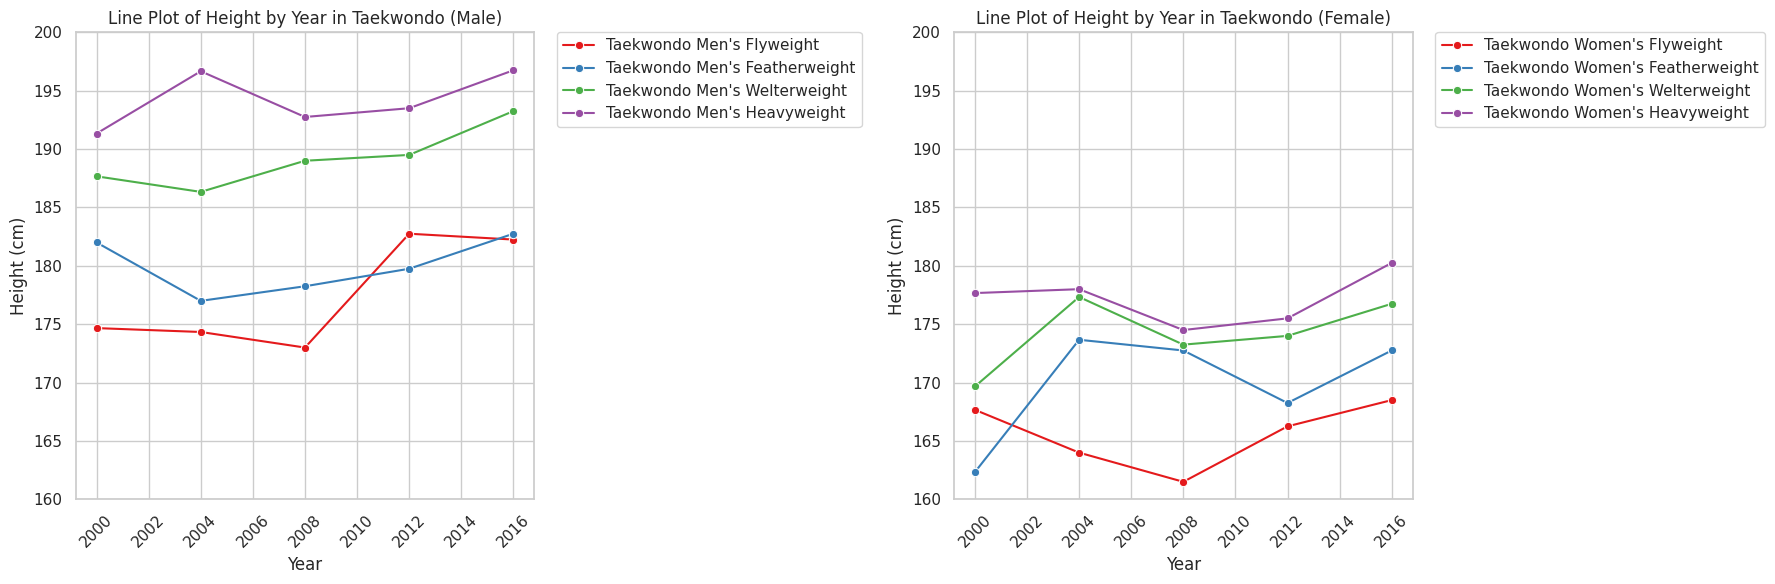

In [157]:
# 남성과 여성 데이터 필터링
df_male = df_Taekwondo_sorted[df_Taekwondo_sorted['Sex_M'] == 1]  # 남성 데이터
df_female = df_Taekwondo_sorted[df_Taekwondo_sorted['Sex_M'] == 0]  # 여성 데이터

# 남성 그래프
plt.figure(figsize=(18, 6))

# 남성 Line plot
plt.subplot(1, 2, 1)  # 첫 번째 플롯
if not df_male.empty:  # 남성 데이터가 비어있지 않다면
    sns.lineplot(x='Year', y='Height', hue='Event', data=df_male, marker='o', palette='Set1', ci=None)
    plt.title('Line Plot of Height by Year in Taekwondo (Male)')
else:
    plt.title('No Data for Male')

plt.xlabel('Year')
plt.ylabel('Height (cm)')
plt.xticks(rotation=45)
plt.ylim(160, 200)  # y축 범위 설정
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# 여성 그래프
plt.subplot(1, 2, 2)  # 두 번째 플롯
if not df_female.empty:  # 여성 데이터가 비어있지 않다면
    sns.lineplot(x='Year', y='Height', hue='Event', data=df_female, marker='o', palette='Set1', ci=None)
    plt.title('Line Plot of Height by Year in Taekwondo (Female)')
else:
    plt.title('No Data for Female')

plt.xlabel('Year')
plt.ylabel('Height (cm)')
plt.xticks(rotation=45)
plt.ylim(160, 200)  # y축 범위 설정
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# Adjust layout for better display
plt.tight_layout()

# Display the plot
plt.show()

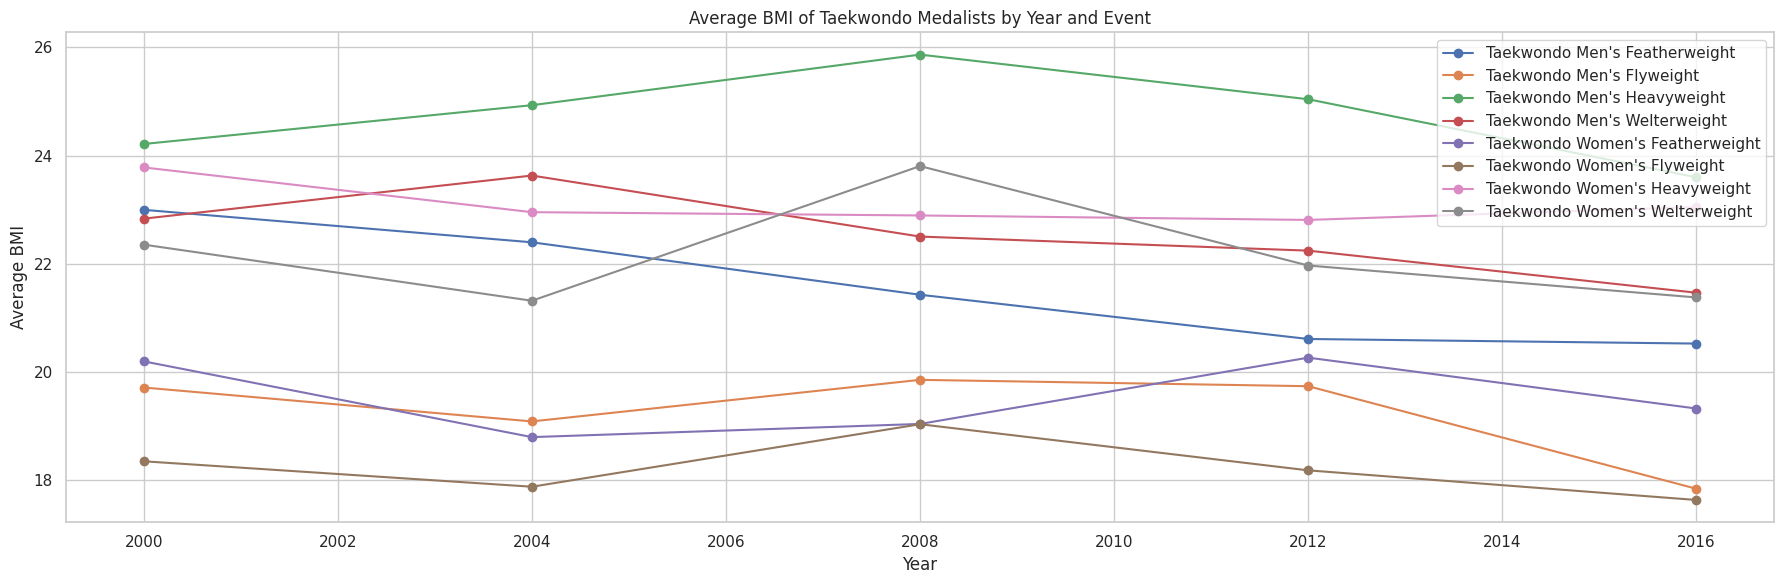

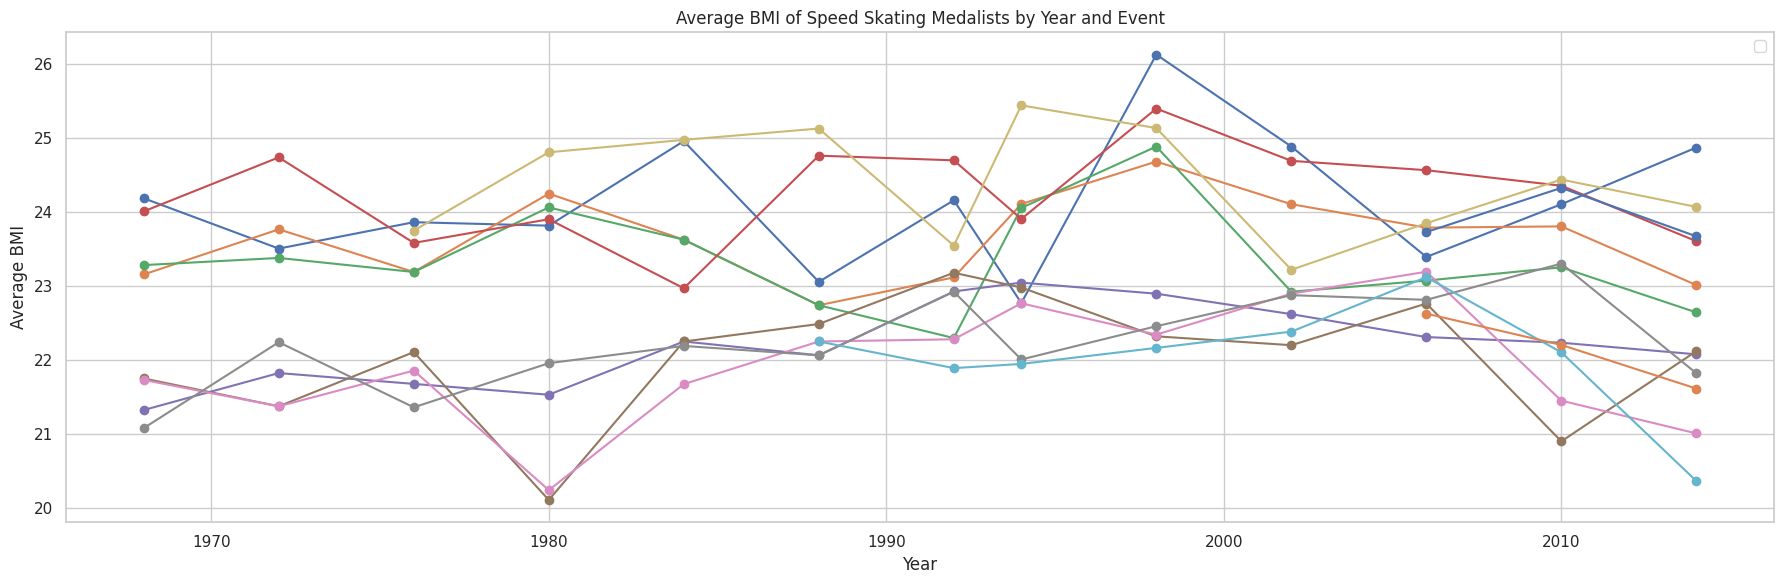

In [158]:
# 각 연도별 평균 BMI 수치
bmi_year_event_taekwondo = df_Taekwondo_sorted.groupby(['Year', 'Event'])['BMI'].mean().reset_index()
bmi_year_event_speedskating = df_SpeedSkating_sorted.groupby(['Year', 'Event'])['BMI'].mean().reset_index()

# Taekwondo plot
plt.figure(figsize=(18, 6))
for event in bmi_year_event_taekwondo['Event'].unique():
    event_data = bmi_year_event_taekwondo[bmi_year_event_taekwondo['Event'] == event]
    plt.plot(event_data['Year'], event_data['BMI'], marker='o', linestyle='-', label=event)

plt.title('Average BMI of Taekwondo Medalists by Year and Event')
plt.xlabel('Year')
plt.ylabel('Average BMI')
plt.grid(True)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Speed Skating plot
plt.figure(figsize=(18, 6))
for event in bmi_year_event_speedskating['Event'].unique():
    event_data = bmi_year_event_speedskating[bmi_year_event_speedskating['Event'] == event]
    plt.plot(event_data['Year'], event_data['BMI'], marker='o', linestyle='-')

plt.title('Average BMI of Speed Skating Medalists by Year and Event')
plt.xlabel('Year')
plt.ylabel('Average BMI')
plt.grid(True)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

<ipython-input-159-bdad119c6aad>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_by_sport = df_filtered.groupby('Sport').apply(lambda x: x.isnull().mean() * 100)
<ipython-input-159-bdad119c6aad>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_by_sport_sorted_height['Height'], y=missing_by_sport_sorted_height.index, palette='Blues_d')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pand

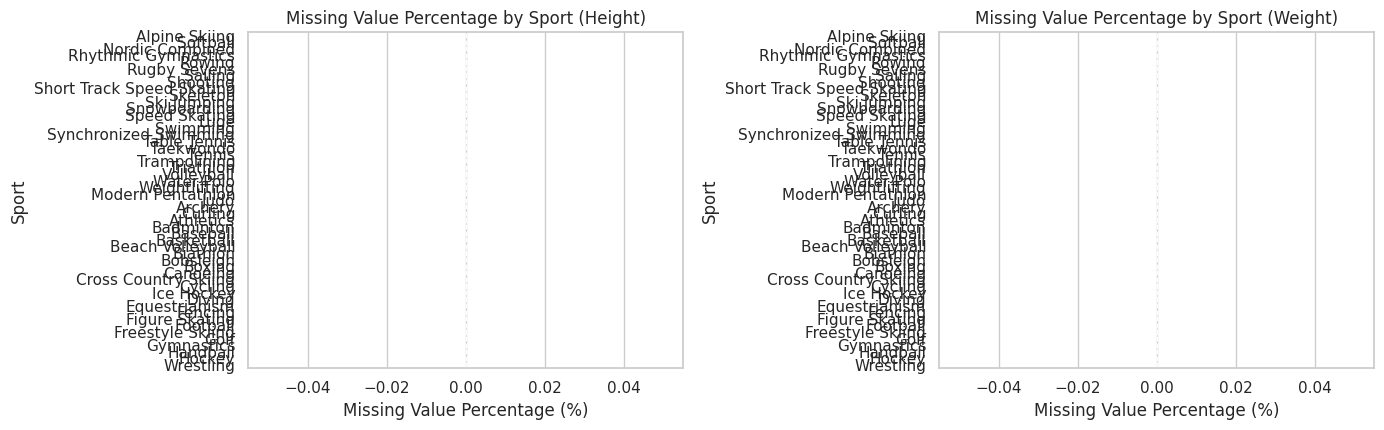

In [159]:
# Calculate the missing value percentage for each sport without resetting the index
missing_by_sport = df_filtered.groupby('Sport').apply(lambda x: x.isnull().mean() * 100)

# Focus on relevant columns (Height, Weight, Age, and Medal as key variables)
missing_by_sport_filtered = missing_by_sport[['Height', 'Weight']]


# Sort the missing value percentages by 'Height', 'Weight', 'Age', and 'Medal' in descending order
missing_by_sport_sorted_height = missing_by_sport_filtered.sort_values(by='Height', ascending=False)
missing_by_sport_sorted_weight = missing_by_sport_filtered.sort_values(by='Weight', ascending=False)

# Create a bar plot for each variable sorted in descending order
plt.figure(figsize=(14, 8))

# Height
plt.subplot(2, 2, 1)
sns.barplot(x=missing_by_sport_sorted_height['Height'], y=missing_by_sport_sorted_height.index, palette='Blues_d')
plt.title('Missing Value Percentage by Sport (Height)')
plt.xlabel('Missing Value Percentage (%)')
plt.ylabel('Sport')

# Weight
plt.subplot(2, 2, 2)
sns.barplot(x=missing_by_sport_sorted_weight['Weight'], y=missing_by_sport_sorted_weight.index, palette='Blues_d')
plt.title('Missing Value Percentage by Sport (Weight)')
plt.xlabel('Missing Value Percentage (%)')
plt.ylabel('Sport')

plt.tight_layout()
plt.show()